# Universitat Oberta de Catalunya  
## Grado en Ingeniería Informática  
### Trabajo Final de Grado (TFG)

---

## Sistema de recomendaciones basado en técnicas de aprendizaje automático para ampliar la exploración de géneros musicales 
**Autor:** Marc Fernández Pereira  
**Bajo supervisión de:** Dra. María Moreno de Castro  
**Área:** Inteligencia Artificial  
**Semestre:** Otoño 2025  


---

## Índice

1. Análisis exploratorio del conjunto de datos (EDA)
   - 1.1. Recopilación de datos
   - 1.2. Descripción de los datos
     - 1.2.1. Estructura y tipología de variables
     - 1.2.2. Valores faltantes y registros duplicados
     - 1.2.3. Estadística descriptiva de variables numéricas
     - 1.2.4. Distribuciones y forma de las variables (asimetría y curtosis)
       - 1.2.4.1. Variables cuantitativas continuas
       - 1.2.4.2. Variables cuantitativas discretas
     - 1.2.5. Valores atípicos
     - 1.2.6. Resumen estadístico para memoria del TFG
   - 1.3. Exploración de los datos
     - 1.3.1. Correlación entre variables numéricas
     - 1.3.2. Visualizaciones de síntesis adicionales
       - 1.3.2.1. Análisis por niveles de popularidad
       - 1.3.2.2. Análisis de características musicales por género
       - 1.3.2.3. Exploración de las relaciones entre características musicales para detectar similitudes entre géneros
   - 1.4. Verificación de los datos y conclusión del EDA
     - 1.4.1. Estructura y calidad del dataset
     - 1.4.2. Estadísticas descriptivas
     - 1.4.3. Distribuciones y forma de las variables
     - 1.4.4. Correlaciones relevantes identificadas
     - 1.4.5. Visualizaciones adicionales
     - 1.4.6. Decisiones de cara a las siguientes etapas

2. Preparación de los datos
   - 2.1. Seleccionar los datos
   - 2.2. Limpiar los datos
     - 2.2.1. Tratar datos faltantes o no disponibles
     - 2.2.2. Seleccionar variables del conjunto final
     - 2.2.3. Eliminación de registros duplicados
     - 2.2.4. Eliminar o corregir datos erróneos o que presenten redundancia
     - 2.2.5. Estandarización de variables mediante Z-score
   - 2.3. Construcción de nuevos datos
   - 2.4. Integración de datos
   - 2.5. Guardado del dataset preprocesado
   - 2.6. Resumen y conclusiones de la fase de preparación

---

### Imports, funciones y librerías

In [1]:
# Este import centraliza todas las librerías estándar, scikit-learn y funciones personalizadas
from imports import *

# 1. Análisis exploratorio del conjunto de datos (EDA)

## 1.1. Recopilación de datos

El primer paso que se debe realizar en la fase de comprensión de los datos es la carga del conjunto de datos para describir el dataset con el que se entrenará el modelo.

In [2]:
# Cargar el conjunto de datos
df = pd.read_csv('dataset.csv')
# Configuración para que se muestren todas las columnas
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

--- 

## 1.2. Descripción de los datos obtenidos

### 1.2.1 Estructura y tipología de variables

In [3]:
# Resumen de variables del dataset

info = []

# Se recorren todas las columnas para extraer información útil para el análisis
for col in df.columns:
    data_type = df[col].dtype
    n = df[col].count()
    unique = df[col].nunique()
    missing = df[col].isnull().sum()
    not_available = df[col].isna().sum()
    sample = df[col].dropna().unique()[:5].tolist()
    
    info.append([col, data_type, n, unique, missing, not_available, sample])

df_description = pd.DataFrame(info)
df_description.columns = ['Variable', 'Tipo de datos', 'Muestras', 'Valores únicos', 'Valores faltantes', 'Valores no disponibles (NA)', 'Valores de ejemplo']

nCols, nRows = df.shape
print(f"El conjunto de datos contiene {nCols} observaciones y {nRows} variables.")

df_description

El conjunto de datos contiene 114000 observaciones y 21 variables.


Variable Tipo de datos  Muestras  Valores únicos  \
0         Unnamed: 0         int64    114000          114000   
1           track_id        object    114000           89741   
2            artists        object    113999           31437   
3         album_name        object    113999           46589   
4         track_name        object    113999           73608   
5         popularity         int64    114000             101   
6        duration_ms         int64    114000           50697   
7           explicit          bool    114000               2   
8       danceability       float64    114000            1174   
9             energy       float64    114000            2083   
10               key         int64    114000              12   
11          loudness       float64    114000           19480   
12              mode         int64    114000               2   
13       speechiness       float64    114000            1489   
14      acousticness       float64    114000            5061   
15  instrumentalness       float64    114000            5346   
16          liveness       float64    114000            1722   
17           valence       float64    114000            1790   
18             tempo       float64    114000           45653   
19    time_signature         int64    114000               5   
20       track_genre        object    114000             114   

    Valores faltantes  Valores no disponibles (NA)  \
0                   0                            0   
1                   0                            0   
2                   1                            1   
3                   1                            1   
4                   1                            1   
5                   0                            0   
6                   0                            0   
7                   0                            0   
8                   0                            0   
9                   0                            0   
10                  0                            0   
11                  0                            0   
12                  0                            0   
13                  0                            0   
14                  0                            0   
15                  0                            0   
16                  0                            0   
17                  0                            0   
18                  0                            0   
19                  0                            0   
20                  0                            0   

                                   Valores de ejemplo  
0                                     [0, 1, 2, 3, 4]  
1   [5SuOikwiRyPMVoIQDJUgSV, 4qPNDBW1i3p13qLCt0Ki3...  
2   [Gen Hoshino, Ben Woodward, Ingrid Michaelson;...  
3   [Comedy, Ghost (Acoustic), To Begin Again, Cra...  
4   [Comedy, Ghost - Acoustic, To Begin Again, Can...  
5                                [73, 55, 57, 71, 82]  
6            [230666, 149610, 210826, 201933, 198853]  
7                                       [False, True]  
8                  [0.676, 0.42, 0.438, 0.266, 0.618]  
9                [0.461, 0.166, 0.359, 0.0596, 0.443]  
10                                   [1, 0, 2, 6, 11]  
11         [-6.746, -17.235, -9.734, -18.515, -9.681]  
12                                             [0, 1]  
13            [0.143, 0.0763, 0.0557, 0.0363, 0.0526]  
14                [0.0322, 0.924, 0.21, 0.905, 0.469]  
15      [1.01e-06, 5.56e-06, 0.0, 7.07e-05, 2.89e-06]  
16               [0.358, 0.101, 0.117, 0.132, 0.0829]  
17                 [0.715, 0.267, 0.12, 0.143, 0.167]  
18          [87.917, 77.489, 76.332, 181.74, 119.949]  
19                                    [4, 3, 1, 5, 0]  
20  [acoustic, afrobeat, alt-rock, alternative, am...

Se observa que el conjunto de datos está formado por un total de **114000 observaciones** y **21 variables**.
Además, también se puede comprobar que se cuenta con una diversidad de datos distribuidos en: **5 variables categóricas** (track_id, artists, album_name, track_name y track_genre), **4 variables numéricas enteras** (popularity, duration_ms, key y time_signature), **9 variables numéricas continuas** (métricas de audio como danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence y tempo), **1 variable booleana** (explicit) y **1 variable binaria discreta** (mode), la cual funciona como una variable binaria e indica la modalidad mayor (1) o menor (0) de cada canción.

se adjunta un diccionario de datos con la descripción de cada variable de acuerdo con la documentación proporcionada por el autor del dataset [**Spotify Tracks Dataset**](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset):

- **unnamed:0**: Identificador incremental de la tabla.
- **track_id**: Identificador único de la canción en Spotify.
- **artists**: Nombres de los artistas que interpretan la canción. Si hay más de un artista, se separan por punto y coma (;).
- **album_name**: Nombre del álbum al que pertenece la canción.
- **track_name**: Nombre de la canción.
- **popularity**: Popularidad de la canción en una escala de 0 a 100, donde 100 es la más popular. Se calcula mediante un algoritmo basado principalmente en el número total de reproducciones y la antigüedad de las mismas. Generalmente, las canciones reproducidas frecuentemente en el presente tienen mayor popularidad que las que fueron populares en el pasado.
- **duration_ms**: Duración de la canción en milisegundos.
- **explicit**: Indica si la canción contiene letras explícitas (true = sí; false = no o desconocido).
- **danceability**: Describe qué tan adecuada es una canción para bailar basándose en elementos musicales como tempo, estabilidad del ritmo y regularidad general. Valores entre 0.0 (menos bailable) y 1.0 (más bailable).
- **energy**: Medida de intensidad y actividad percibida de 0.0 a 1.0. Las canciones energéticas suelen sonar rápidas, fuertes y ruidosas (ej: death metal tiene alta energía; un preludio de Bach tiene baja energía).
- **key**: Tonalidad de la canción. Los enteros se mapean a notas usando la notación estándar Pitch Class (0 = Do, 1 = Do#/Reb, 2 = Re, etc.). Si no se detecta tonalidad, el valor es -1.
- **loudness**: Sonoridad general de la canción en decibelios (dB).
- **mode**: Modalidad de la canción (mayor o menor), indicando el tipo de escala de la que deriva su contenido melódico. Valores: 1 = mayor, 0 = menor.
- **speechiness**: Detecta la presencia de palabras habladas en la canción. Valores superiores a 0.66 indican pistas probablemente habladas (talk show, audiolibro); entre 0.33 y 0.66 pueden contener música y habla (rap); menores a 0.33 representan principalmente música.
- **acousticness**: Medida de confianza de 0.0 a 1.0 sobre si la canción es acústica. 1.0 indica alta confianza de que es acústica.
- **instrumentalness**: Predice si la canción no contiene vocales. Valores cercanos a 1.0 indican mayor probabilidad de ausencia de contenido vocal.
- **liveness**: Indica la presencia de personas en la grabación. Valores altos representan mayor probabilidad de que la canción fue interpretada en vivo. Valores superiores a 0.8 indican alta probabilidad de interpretación en vivo.
- **valence**: Medida de 0.0 a 1.0 que describe la positividad musical transmitida por la canción. Valores altos suenan más positivos (alegres, eufóricos), mientras que valores bajos suenan más negativos (tristes, depresivos).
- **tempo**: Tempo estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo indica la velocidad o ritmo de una pieza y se deriva directamente de la duración media de los pulsos.
- **time_signature**: Compás estimado. El compás es una convención musical que indica cuántos tiempos hay en cada compás. Su valor oscila entre 3 y 7, representando compases de 3/4 hasta 7/4.
- **track_genre**: Género musical al que pertenece la canción.


### 1.2.2 Valores faltantes y registros duplicados

Se observa que el conjunto de datos **no presenta valores faltantes** a excepción de **una observación** que no dispone de información sobre la persona artista, el álbum y el nombre de la canción. 

Además, cabe destacar que la variable **unnamed:0** no aporta valor para el desarrollo del proyecto ya que se trata de un identificador incremental de cada muestra y, en consecuencia, podría influir negativamente en los resultados de los algoritmos de *clustering*. Por esta razón, se elimina esta columna antes de proceder con el análisis, a pesar de estar aún en la fase de comprensión de datos y no en la fase de preparación ya que la presencia de esta columna dificulta la identificación de registros duplicados, aspecto que debe ser analizado en esta fase.

A continuación, se procede a identificar si existen datos **duplicados** en el conjunto de datos:

In [4]:
try:
    df = df.drop(columns=['Unnamed: 0'])
except:
    print("La columna 'Unnamed: 0' no existe en el conjunto de datos.")

duplicated = df.duplicated().sum()
print("\n")
print(f"El número total de duplicados es de {duplicated}, lo que representa un total del {duplicated/len(df)*100:.2f}% del total de datos.")



El número total de duplicados es de 450, lo que representa un total del 0.39% del total de datos.


Los resultados muestran que el conjunto de datos contiene **450 registros duplicados**, lo que representa el **0.39% del total de observaciones**. Este porcentaje es relativamente bajo y, por tanto, no debería afectar significativamente el análisis exploratorio inicial. 

Sin embargo, es importante tener en cuenta que estos duplicados deberán ser eliminados durante la **fase de preparación de datos**, junto con el registro que presenta valores faltantes, con el objetivo de seguir las directrices que marca la metodología CRISP-DM.

### 1.2.3 Estadística descriptiva de variables numéricas

#### Resumen estadístico de variables numéricas

In [5]:
# Separamos las variables numéricas y las categóricas en dos dataframes distintos
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(include = object)
# Describir variables numéricas
desc_df = num_df.describe().round(2)
desc_df.rename(index={'50%': 'median'}, inplace=True)
desc_df

popularity  duration_ms  danceability     energy        key  \
count    114000.00    114000.00     114000.00  114000.00  114000.00   
mean         33.24    228029.15          0.57       0.64       5.31   
std          22.31    107297.71          0.17       0.25       3.56   
min           0.00         0.00          0.00       0.00       0.00   
25%          17.00    174066.00          0.46       0.47       2.00   
median       35.00    212906.00          0.58       0.68       5.00   
75%          50.00    261506.00          0.70       0.85       8.00   
max         100.00   5237295.00          0.98       1.00      11.00   

         loudness       mode  speechiness  acousticness  instrumentalness  \
count   114000.00  114000.00    114000.00     114000.00         114000.00   
mean        -8.26       0.64         0.08          0.31              0.16   
std          5.03       0.48         0.11          0.33              0.31   
min        -49.53       0.00         0.00          0.00              0.00   
25%        -10.01       0.00         0.04          0.02              0.00   
median      -7.00       1.00         0.05          0.17              0.00   
75%         -5.00       1.00         0.08          0.60              0.05   
max          4.53       1.00         0.96          1.00              1.00   

         liveness    valence      tempo  time_signature  
count   114000.00  114000.00  114000.00       114000.00  
mean         0.21       0.47     122.15            3.90  
std          0.19       0.26      29.98            0.43  
min          0.00       0.00       0.00            0.00  
25%          0.10       0.26      99.22            4.00  
median       0.13       0.46     122.02            4.00  
75%          0.27       0.68     140.07            4.00  
max          1.00       1.00     243.37            5.00

El primer hecho que se observa en la descripción estadística anterior es que algunas variables se representan en rangos muy distintos a las demás. Por ejemplo, **duration_ms** toma valores desde 0 hasta 5237295, lo que podría sesgar el análisis y, en consecuencia, obtener un resultado no esperado. Además, en general las variables operan en escalas heterogéneas, por lo que en la fase de preparación se normalizarán/estandarizarán los datos para homogeneizar escalas y evitar que ninguna característica domine el cálculo de distancias en los algoritmos de *clustering*. Otro hecho a destacar y que merece prestar atención es la presencia de múltiples valores mínimos iguales a 0. Para comprender la situación se procede a cuantificar por variable cuántas muestras toman valores igual a 0:

In [6]:
df[df == 0].count()

track_id                 0
artists                  0
album_name               0
track_name               0
popularity           16020
duration_ms              1
explicit            104253
danceability           157
energy                   1
key                  13061
loudness                 0
mode                 41319
speechiness            157
acousticness            39
instrumentalness     38763
liveness                 2
valence                176
tempo                  157
time_signature         163
track_genre              0
dtype: int64

Sin ser expertos en materia musical, se puede observar algunas incongruencias:
- **tempo**: toda composición musical está definida por un tempo expresado en pulsos por minuto, por lo que resulta prácticamente imposible que el valor del tempo sea igual a 0. Este caso probablemente se deba a un error de medición.
- **time_signature**: de forma análoga al tempo, toda canción debe estar compuesta dentro de un compás, por lo que valores iguales a 0 tampoco tienen sentido. Es probable que también se trate de un error de medición.
- **duration_ms**: aunque únicamente se detecta una muestra con duración igual a 0, este valor tampoco resulta coherente dentro del contexto musical.

En cuanto al resto de variables, los valores iguales a 0 sí pueden tener sentido musical. Por ejemplo, que la **popularity** de una canción sea 0 indica que su nivel de reproducciones por parte de la audiencia es mínimo o nulo. Lo mismo ocurre con **valence**, **liveness**, **instrumentalness**, **acousticness**, **speechiness**, **danceability** o **energy**: que estas variables adopten valores iguales a 0 refleja rasgos propios de la pieza, como la ausencia de voz, baja energía o carencia de componentes acústicos. Y, por último, cabe destacar que la variable **mode** se comporta como un dato booleano ya que toma valores igual a 0 o 1. 


### 1.2.4 Distribuciones y forma de las variables (asimetría y curtosis)

#### Metodología: asimetría (Fisher–Pearson) y curtosis

Llegados a este punto, para analizar el comportamiento de las variables se complementará la tabla estadística con un gráfico de distribuciones para cada una de ellas. Antes de proceder con ello, se excluirán del conjunto numérico aquellas variables discretas no continuas, como key, que define un rango de 0 a 11 para referirse a la tonalidad de la canción, y time_signature, que representa el compás musical. Dado que ambas son variables con un número limitado de valores posibles, su análisis mediante histogramas no resultaría representativo, por lo que se optará por tratarlas como variables categóricas y analizarlas mediante otro tipo de gráficas. Además, para facilitar el análisis se calculará para cada distribución el coeficiente de Fisher-Pearson y el grado de curtosis.

##### Cálculos del Coeficiente de Fisher-Pearson y el grado de Curtosis
A veces no es tarea sencilla determinar la forma de una distribución simplemente mirando un gráfico. Para ello se propone extraer el coeficiente de asimetría de la distribución y su grado de [curtosis](https://en.wikipedia.org/wiki/Kurtosis). Por un lado, el grado de asimetría permite extraer la longitud de las colas (tanto de la izquierda como de la derecha) de una distribución para identificar sesgos en los datos. Por otro lado, la curtosis indica cuán puntiaguda o plana es la distribución, es decir, se centra en definir la altura de la misma.

Para obtener el grado de asimetría se utilizará el [coeficiente de asimetría de Fisher–Pearson](https://teflpedia.com/Fisher%E2%80%93Pearson_sample_skewness) para cada distribución. Los valores obtenidos mediante la implementación del coeficiente cercanos al 0 indicarán que la distribución tiende a ser simétrica. Sin embargo, si se obtiene un valor > 0 quiere decir que la distribución es asimétrica positiva (cola a la derecha) y si el valor < 0 la distribución es asimétrica negativa (cola a la izquierda). Cabe destacar que, a pesar de que se obtenga un valor distinto a 0 pero muy cercano, se podría considerar que la distribución tiende a ser normal. Así pues, para extraer la asimetría de cada variable se deberá aplicar la siguiente ecuación:

$$
\text{Skewness} = \frac{n}{(n - 1)(n - 2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$


En una distribución normal, la curtosis toma el valor $k = 3$. Habitualmente se reporta el exceso de curtosis, definido como $k - 3$, para centrar la interpretación respecto a la normal. La fórmula del exceso de curtosis es:

$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3
$$

Los resultados se pueden interpretar de la siguiente manera:

- **Distribución leptocúrtica (> 0)**: colas más pesadas y pico más alto
- **Distribución platicúrtica (< 0)**: colas más ligeras y pico más bajo
- **Distribución mesocúrtica (= 0)**: similar a la distribución normal

Llegados a este punto, se procede a realizar el análisis descriptivo de las variables numéricas.

### 1.2.4.1 Variables cuantitativas continuas
#### Variable duration_ms

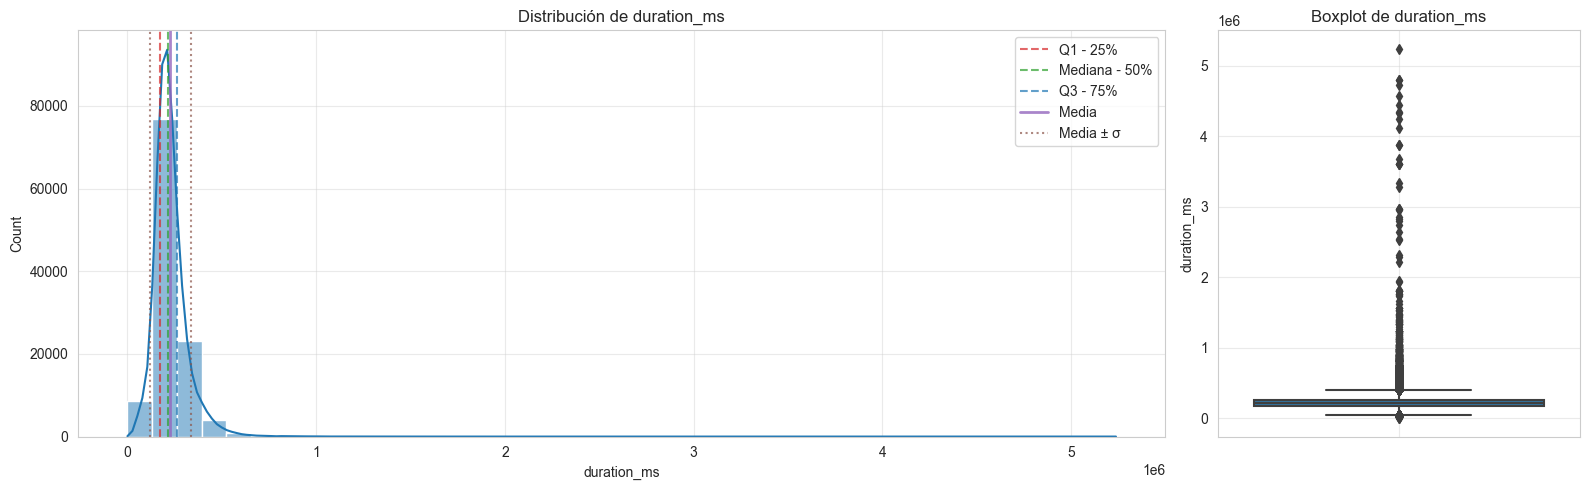

Coeficiente de asimetría:' 11.195328786762138
Grado de curtosis:' 354.9367951143022


In [7]:
# Distribución de duration_ms
plot_distribution(num_df, 'duration_ms')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'duration_ms')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'duration_ms')}")

La distribución presenta una larga cola hacia la derecha, lo que indica una asimetría positiva pronunciada y un claro sesgo hacia valores altos. El valor de curtosis (354) se encuentra muy alejado del correspondiente a una distribución normal (0 de exceso), lo que confirma que la forma es altamente leptocúrtica, caracterizada por un pico agudo y colas pesadas. Esto sugiere que la mayoría de las canciones (aproximadamente la mitad) presentan duraciones cercanas a la mediana (212906 ms, equivalentes a 3,54 min), es decir, relativamente cortas respecto al resto.
En el boxplot se aprecian valores atípicos extremos que se alejan del rango intercuartílico, con un máximo de 5237295 ms (87 min), lo que podría corresponder a grabaciones extensas, como mezclas continuas, conciertos, sesiones musicales o incluso podcasts y audiolibros.


#### Variable danceability

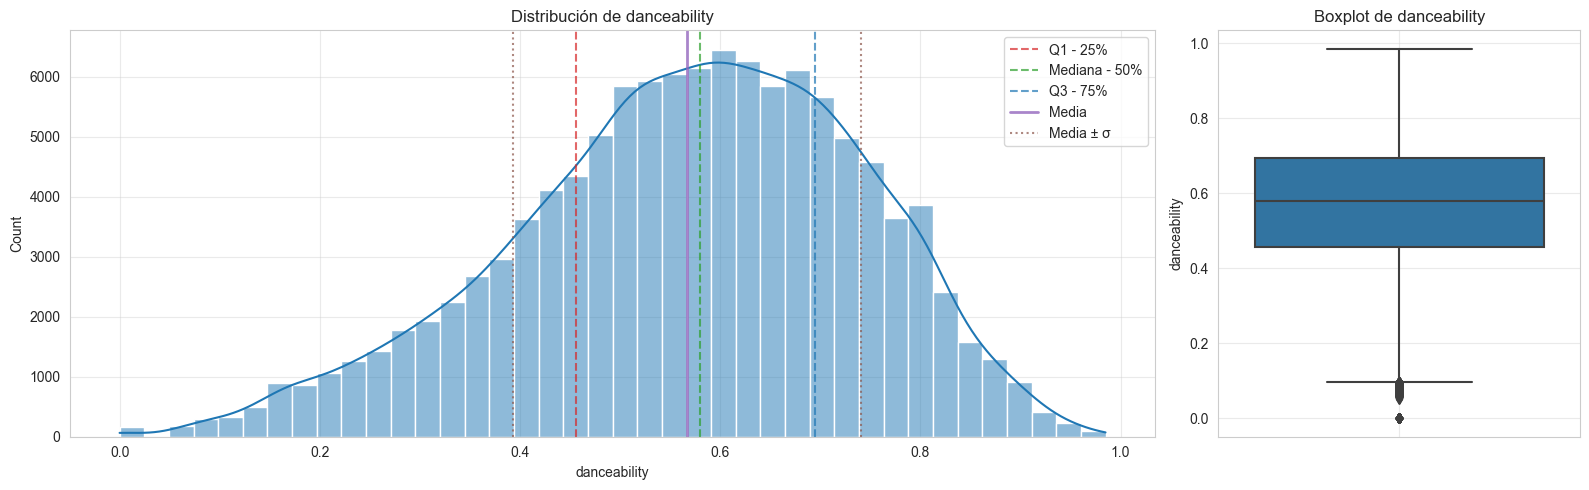

Coeficiente de asimetría:' -0.39950189010665244
Grado de curtosis:' -0.18454699373702477


In [8]:
# Distribución de danceability
plot_distribution(num_df, 'danceability')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'danceability')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'danceability')}")

La variable danceability toma valores de asimetría y curtosis cerca de -0,39 y -018 respectivamente, lo que evidencia que la distribución de los datos se acerca a la forma simétrica tanto en dispersión como en altura formando una ligera cola hacia la izquierda. Los datos evidencian dos aspectos importantes: por un lado, se puede interpretar como que hay más canciones aptas para bailar que canciones que no son tan bailables y, por otro lado, se puede observar que prácticamente toda la música es apta para poder bailar en mayor o menor medida. La variable es numérica y acotada en el rango [0, 1], donde los valores más altos indican una mayor presencia de la característica medida.

#### Variable energy

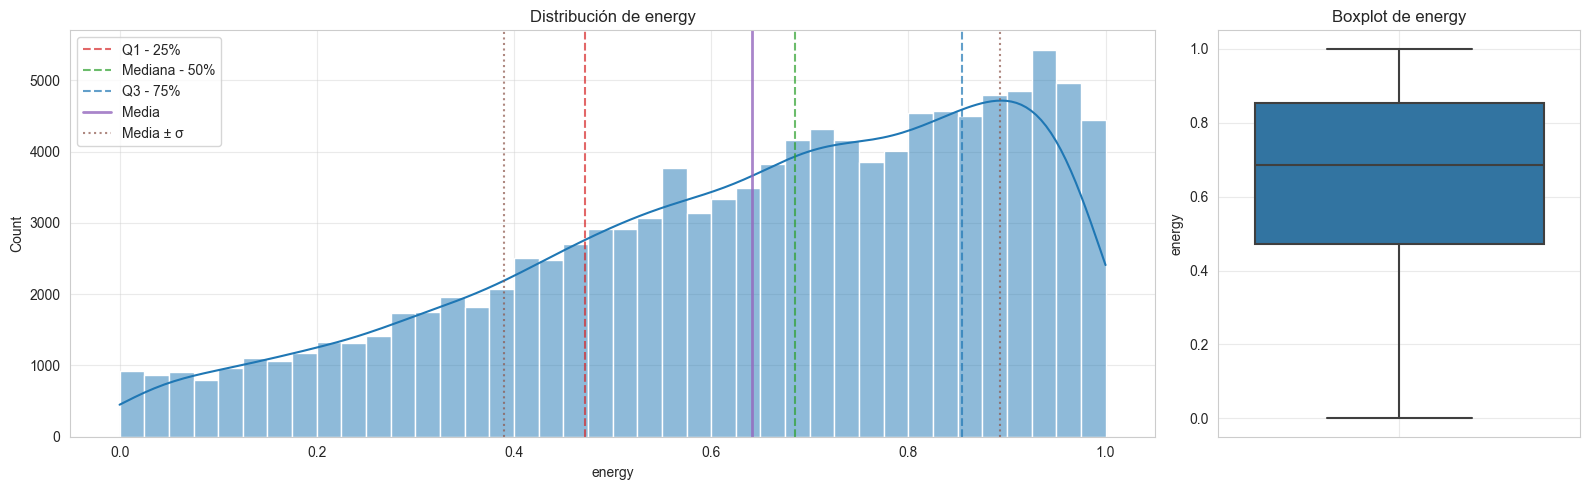

Coeficiente de asimetría:' -0.5970092723881604
Grado de curtosis:' -0.5257403985822098


In [9]:
# Distribución de energy
plot_distribution(num_df, 'energy', bw_adjust = 2)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'energy')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'energy')}")

La variable energy presenta un coeficiente de asimetría de -0,59, lo que indica una asimetría negativa moderada con una ligera cola hacia la izquierda. En otras palabras, existen más canciones con valores altos de energía que con valores bajos lo que se refleja una tendencia general hacia música enérgica. El grado de curtosis de -0,52 sugiere una distribución platicúrtica, es decir, algo más aplanada que una distribución normal. Esto implica una menor concentración de valores en torno a la media y una mayor dispersión relativa. En conjunto, puede interpretarse que la mayoría de las canciones del conjunto presentan niveles de energía elevados (entre ~0.4 y ~0.9), aunque existe cierta variabilidad que refleja la presencia de temas más suaves o menos intensos en menor proporción. No se observan *outliers*. La variable es numérica y acotada en el rango [0, 1], donde los valores más altos indican una mayor presencia de la característica medida.

#### Variable loudness

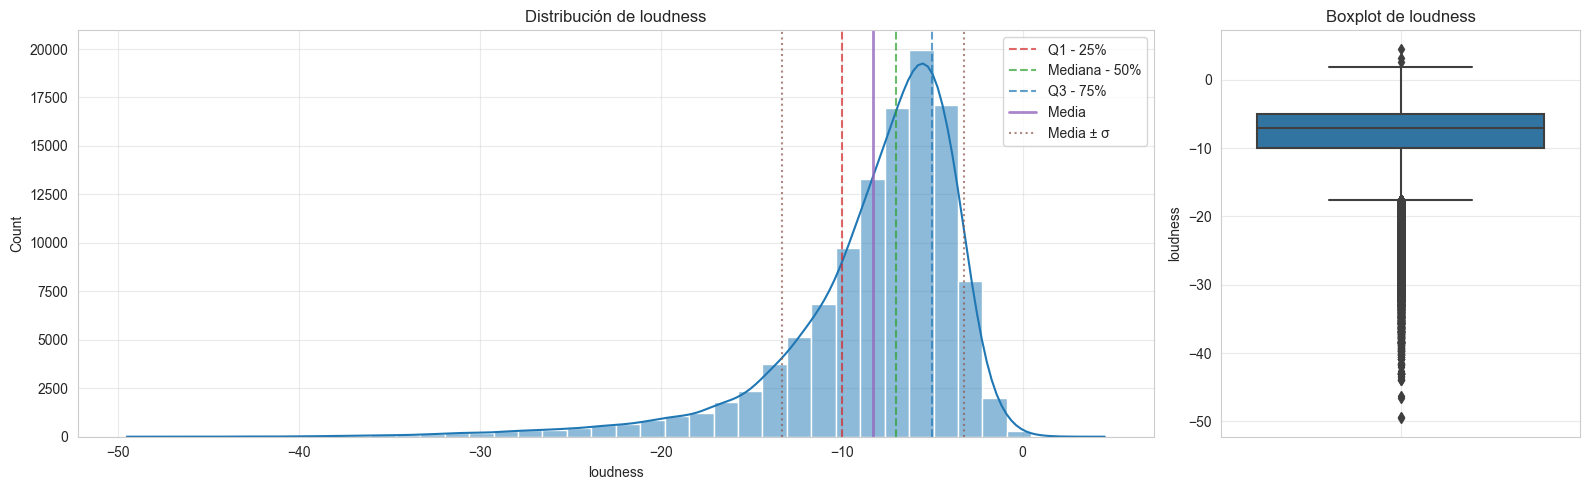

Coeficiente de asimetría:' -2.006568335884186
Grado de curtosis:' 5.895966941358784


In [10]:
# Distribución de loudness
plot_distribution(num_df, 'loudness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'loudness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'loudness')}")

Para interpretar estos resultados, es importante comprender que, en términos musicales, el nivel 0 dB representa el máximo nivel de intensidad sonora que puede alcanzar una canción, mientras que los valores negativos indican niveles de volumen más bajos.
Generalmente, las observaciones del conjunto de datos se sitúan entre -5 dB y -15 dB, lo que implica que la mayoría de las canciones comprendidas dentro del rango intercuartílico presentan un nivel de sonoridad elevado.
Estas conclusiones se sustentan en el coeficiente de asimetría (-2,00) y en el grado de curtosis (5,8), que reflejan una distribución fuertemente asimétrica negativa y leptocúrtica; dicho de otro modo, la variable loudness forma una cola pronunciada hacia la izquierda, indicando la presencia de canciones con niveles de volumen considerablemente más bajos respecto al conjunto general.


#### Variable speechiness

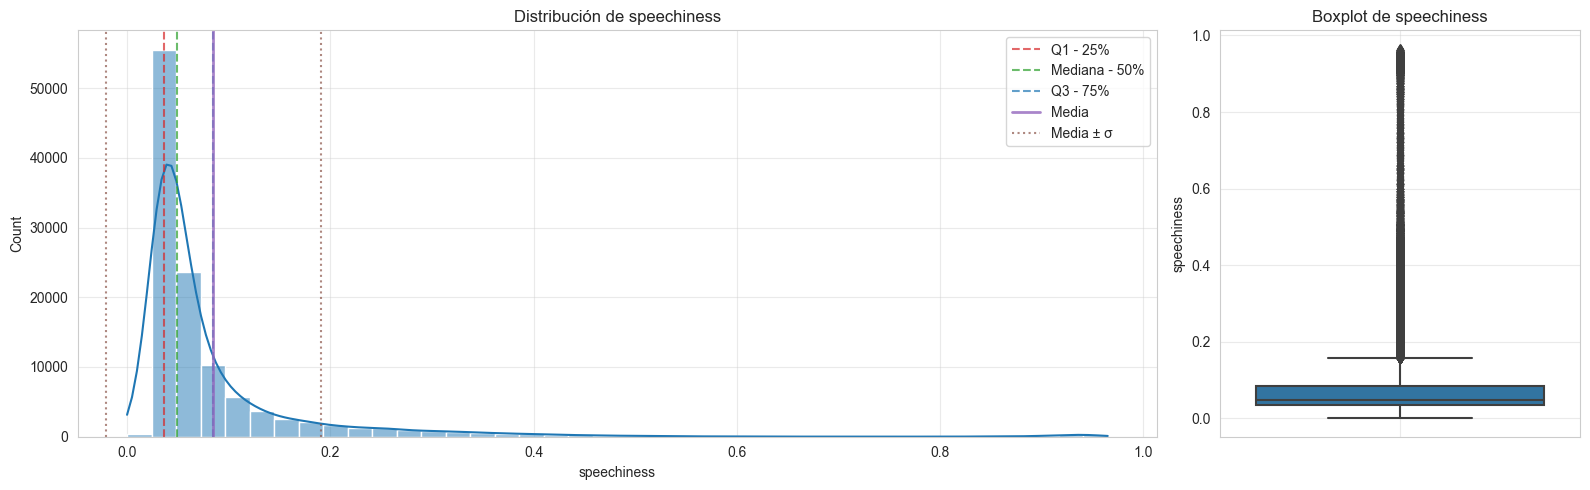

Coeficiente de asimetría:' 4.6475771700232675
Grado de curtosis:' 28.823059897474728


In [11]:
# Distribución de speechiness
plot_distribution(num_df, 'speechiness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'speechiness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'speechiness')}")


La variable speechiness presenta un coeficiente de asimetría positivo elevado (4,65), lo que evidencia una distribución leptocúrtica fuertemente sesgada a la derecha. Esto significa que la gran mayoría de canciones presentan niveles muy bajos de contenido hablado ya que están sesgadas fuertemente hacia 0. Sin embargo, tal y como se observa en el boxplot existen múltiples *outliers* cerca de 1, lo que sugiere la hipótesis de que algunos registros son audiolibros, podcasts, canciones de rap, etc. Se observa una alta cantidad de *outliers*.

En resumen, el rango de esta variable está comprendido entre 0 y 1, reflejando que se trata de una medida proporcional donde los valores más altos indican una mayor presencia de voz hablada frente al contenido musical.

#### Variable acousticness

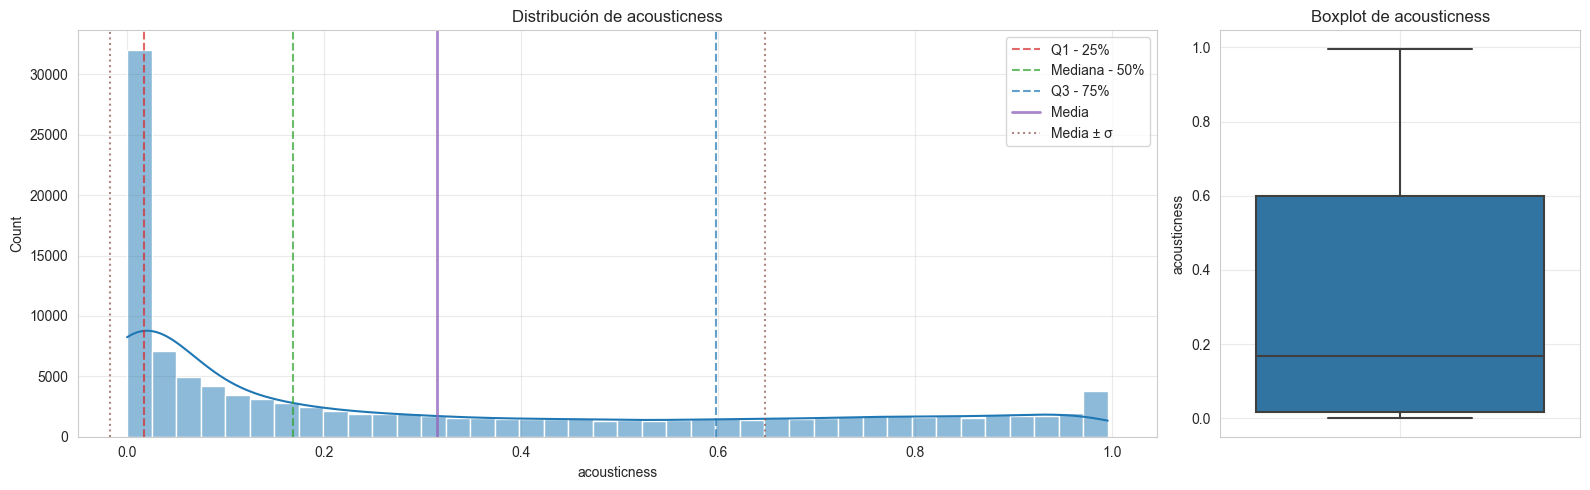

Coeficiente de asimetría:' 0.7273044304959352
Grado de curtosis:' -0.9499422537291213


In [12]:
# Distribución de acousticness
plot_distribution(num_df, 'acousticness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'acousticness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'acousticness')}")

En este caso, la distribución presenta una asimetría positiva (extendida hacia la derecha) marcada pero no exagerada tomando un coeficiente de 0.72, donde se concentran la gran mayoría de datos entre 0 y 0.65. Esto indica que la mayoría de las canciones del conjunto de datos tienden a tener una baja componente acústica, es decir, predominan las producciones no acústicas. Sin embargo, el boxplot muestra que existe una variabilidad considerable y un número significativo de canciones con valores altos de acousticness, correspondientes a temas predominantemente acústicos, como grabaciones en vivo, acústicas o de géneros más orgánicos (folk, jazz, clásica, etc.)

#### Variable instrumentalness

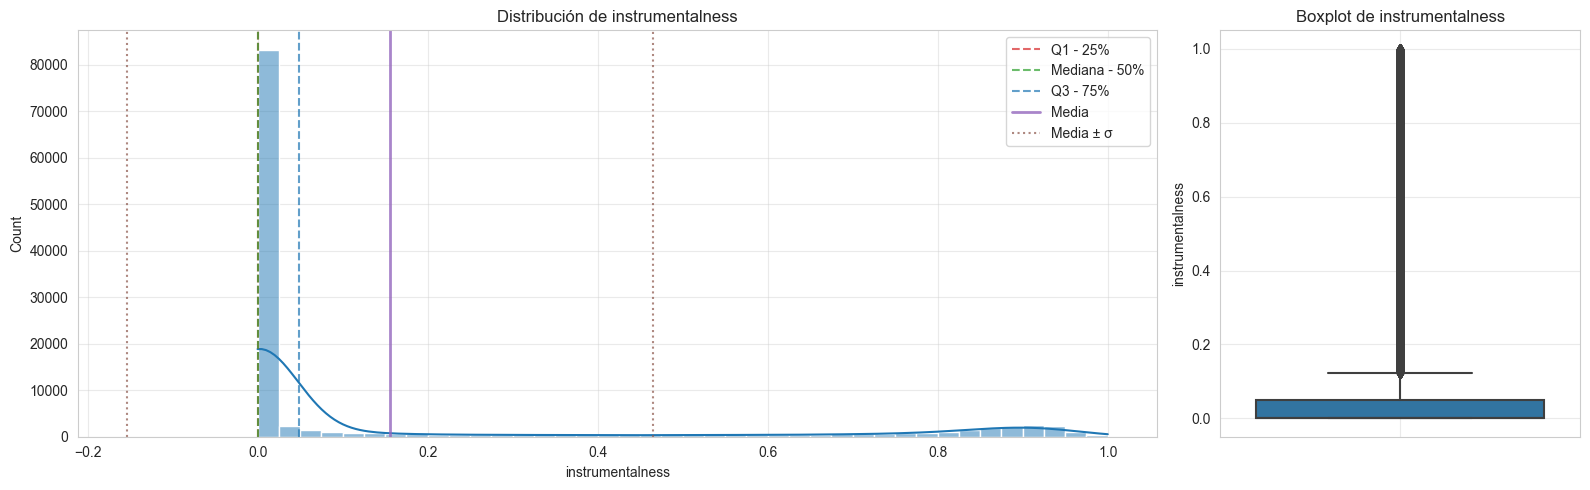

Coeficiente de asimetría:' 1.734429014063966
Grado de curtosis:' 1.270638713432743


In [13]:
# Distribución de instrumentalness
plot_distribution(num_df, 'instrumentalness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'instrumentalness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'instrumentalness')}")

En este caso, la distribución muestra nuevamente una cola pronunciada hacia la derecha, con un coeficiente de asimetría positivo de 1,73, lo que indica una asimetría moderada-alta. Este comportamiento sugiere que la mayoría de las canciones del conjunto están compuestas con una importante presencia instrumental, ya que el rango intercuartílico se concentra muy cerca de 0.
No obstante, al igual que en otras variables, se observan numerosos *outliers* que representan canciones con baja presencia de instrumentos, con valores próximos a 1.

#### Variable liveness

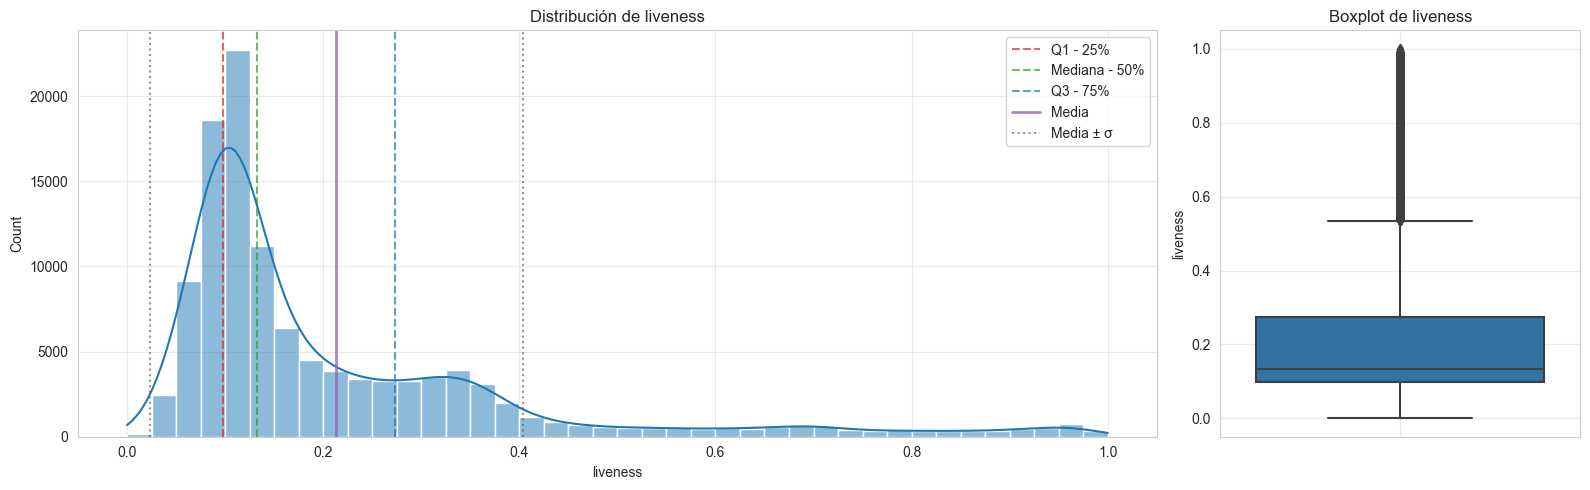

Coeficiente de asimetría:' 2.105765824496327
Grado de curtosis:' 4.378023604260285


In [14]:
# Distribución de liveness
plot_distribution(num_df, 'liveness', bw_adjust =  1.5)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'liveness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'liveness')}")

En este caso, la distribución presenta una cola alargada hacia la derecha, con un coeficiente de asimetría de 2,10, lo que evidencia una asimetría positiva pronunciada. Este comportamiento indica que la mayoría de las canciones presentan valores bajos de liveness, lo que sugiere que fueron grabadas en estudio de grabación. Sin embargo, también se visualizan  varios *outliers* donde se puede interpretar que también hay canciones grabadas en directo como por ejemplo en un concierto.

La variable es numérica y acotada en el rango [0, 1], donde los valores más altos indican una mayor presencia de la característica medida.

#### Variable valence

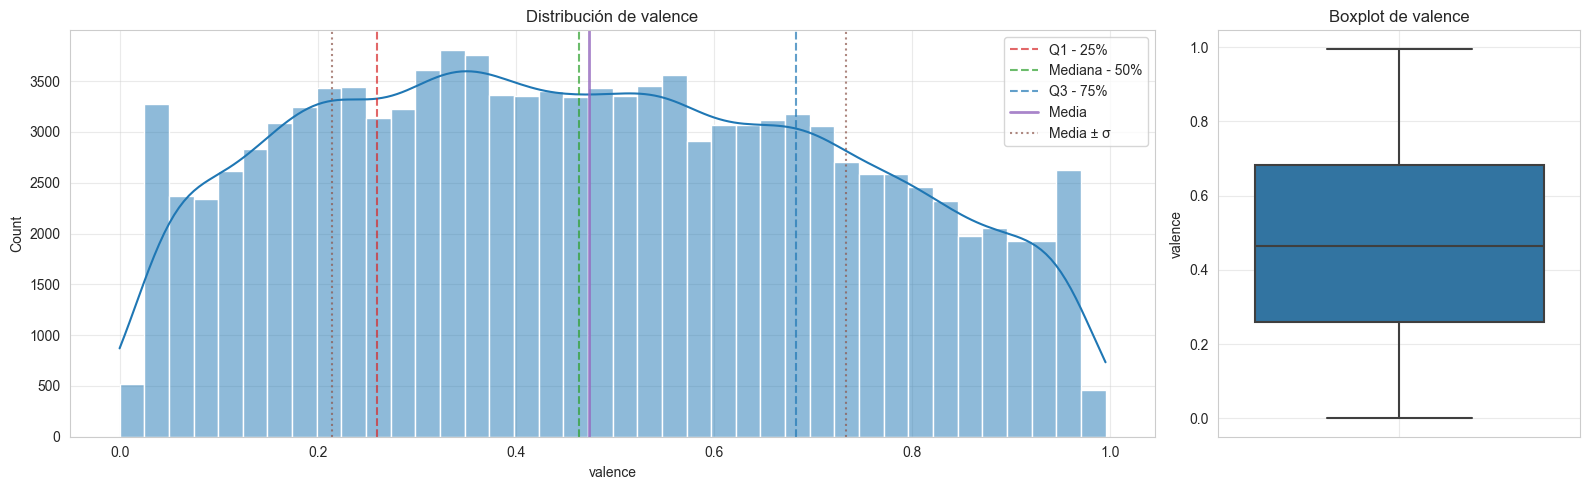

Coeficiente de asimetría:' 0.11507955625243346
Grado de curtosis:' -1.0274373041595617


In [15]:
# Distribución de valence
plot_distribution(num_df, 'valence')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'valence')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'valence')}")

El primer hecho que se visualiza es que el atributo valence tiende a ser simétrico con un valor próximo a 0 (0.11). Además, el grado de curtosis demuestra que existe cierto aplanamiento (distribución mesocúrtica) pero tampoco se aleja mucho de la distribución simétrica perfecta. Así pues, esta variable presenta una distribución bastante equilibrada, sin una asimetría destacable, lo que indica que los valores de positividad emocional se reparten de forma relativamente homogénea a lo largo del rango [0, 1]. Esto sugiere que el conjunto de datos incluye canciones tanto alegres como melancólicas en proporciones similares, sin que predomine un tono emocional concreto. El boxplot confirma esta observación, mostrando una dispersión uniforme y la ausencia de valores atípicos significativos.

#### Variable tempo

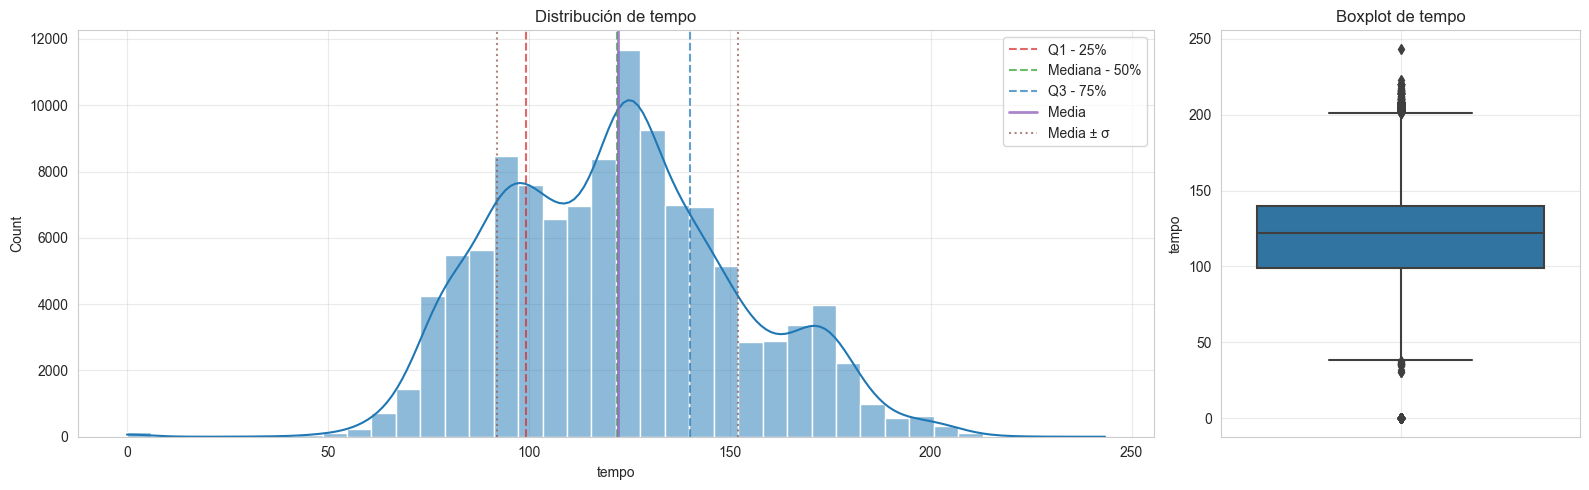

Coeficiente de asimetría:' 0.23229791709660788
Grado de curtosis:' -0.10862847700699119


In [16]:
# Distribución de tempo
plot_distribution(num_df, 'tempo', bw_adjust = 2)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'tempo')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'tempo')}")

La variable tempo presenta una distribución multimodal, con varios picos de frecuencia entre 80 y 150 ppm, que coinciden con los rangos de ritmo más habituales en géneros populares como el pop, el rock o la música electrónica. Se ha decido configurar un ajuste de ancho de banda del kernel (kde) igual a 5 para suavizar la curva y evitar los picos ocasionados lo que demuestra que la distribución de datos de tempo se acerca a una distribución normal. Además, se observa además que la media se sitúa en 120ppm lo que sugiere que este tempo es el equilibrio entre música lenta y rápida. Y, por último, cabe señalar que el boxplot muestra algunos *outliers* asociados a canciones muy lentas o extremadamente rápidas, aunque su presencia no es realmente muy significativa.

### 1.2.4.2 Variables cuantitativas discretas

A continuación, se procede a analizar las variables cuantitativas discretas. 

#### Variable popularity

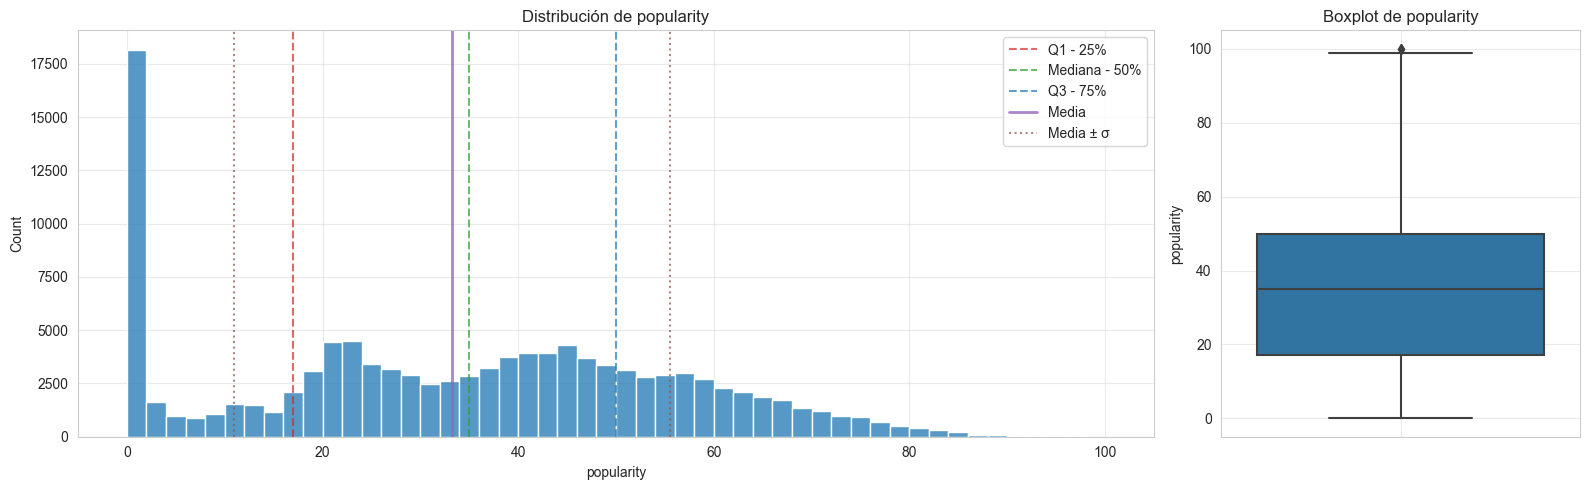

Coeficiente de asimetría:' 0.0464031263978908
Grado de curtosis:' -0.9277672588620525


In [17]:
plot_distribution(num_df, 'popularity', kde=False, bins=50)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'popularity')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'popularity')}")

El hecho más evidente que se puede observar en el histograma de frecuencias de la variable popularity es la presencia de un gran número de canciones con valores de popularidad muy bajos, aproximadamente unas 20000 observaciones con valores cercanos a cero. Este comportamiento se debe a que existe una gran cantidad de canciones poco conocidas o apenas reproducidas por las personas usuarias.

Desde el punto de vista estadístico, el coeficiente de asimetría toma un valor cercano a 0 (0.046), lo que indica que la distribución puede considerarse prácticamente simétrica. A simple vista podría parecer que la cola se extiende hacia la derecha, pero el elevado número de canciones con popularidad baja compensa la distribución lo que equilibra su dispersión.

En cuanto al grado de curtosis (-0.928), al ser un valor inferior a 0, se concluye que la distribución es platicúrtica, es decir, presenta un pico más aplanado y colas más ligeras que la distribución normal. Este hecho refleja una menor concentración de valores en torno a la media.

Por otro lado, se aprecia que dentro del conjunto de datos existen muy pocas canciones con valores de popularidad elevados, cercanos a 100, que actúan como valores atípicos (outliers) y corresponden probablemente a los temas más reproducidos en la plataforma.

Cabe destacar que la métrica de popularidad no describe una propiedad musical del audio, sino que se calcula algorítmicamente en función del número total de reproducciones y la recencia de las mismas (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset). Por lo tanto, los valores bajos reflejan canciones menos escuchadas o más antiguas, mientras que los valores altos corresponden a temas con mayor difusión en la actualidad.

#### Variable key y time_signature

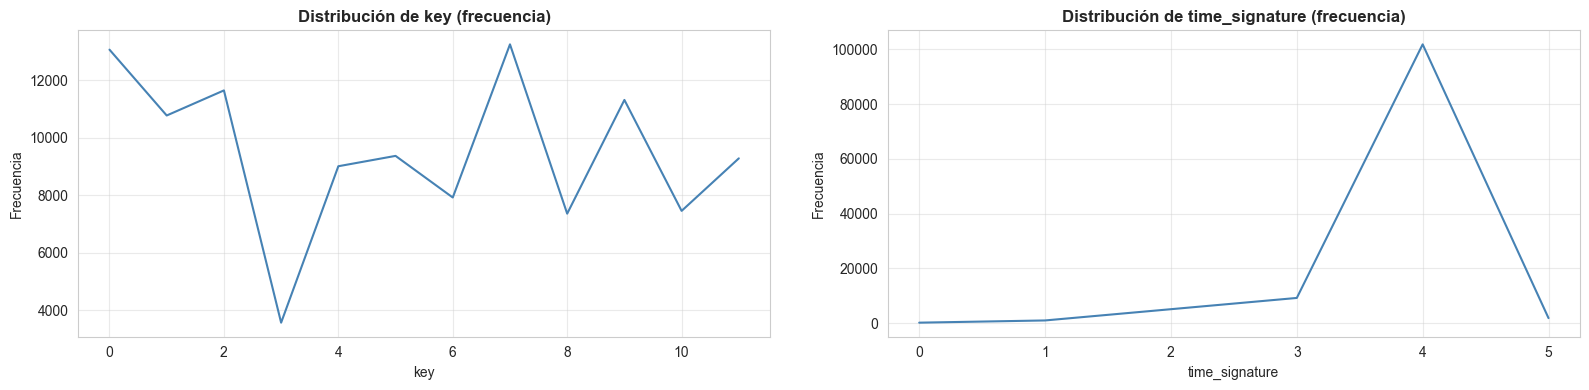

In [18]:
visualize_discrete_features(num_df, ['key', 'time_signature'])

#### Variables key y time_signature

En el caso de las variables key y time_signature, se observa que ambas presentan una naturaleza discreta y ordinal. Es por este motivo por el cual se decide representar mediante gráficos de líneas ya que permiten visualizar la frecuencia de aparición de cada categoría.

En la variable key, los valores se distribuyen de forma irregular entre las doce tonalidades posibles. Este comportamiento sugiere que las canciones del conjunto de datos abarcan una amplia variedad tonal, sin predominio evidente de una tonalidad específica.

Por otro lado, la variable time_signature (compás musical) muestra una concentración muy marcada en el valor 4. En el conjunto de datos Spotify Tracks Dataset se considera que el valor 4 refiere al compás 4/4, el más habitual en la mayoría de los géneros musicales populares. En contraste, los compases alternativos, como 3/4 (valor 3) o 5/4 (valor 5), aparecen con una frecuencia mucho menor, lo que evidencia que la gran mayoría de las canciones siguen estructuras rítmicas basadas en compases de 4 tiempos por 4 negras.


### 1.2.5 Valores atípicos

Antes de decidir cómo se tratarán los valores atípicos en la fase de preparación de los datos, resulta conveniente analizar los *outliers* de cada variable para determinar si realmente podrían afectar al desarrollo y posterior implementación del modelo. Para ello, se han empleado representaciones tipo boxplot, que permiten visualizar la presencia y magnitud de los valores extremos.

Por un lado, las variables energy, acousticness, valence y popularity no presentan valores atípicos significativos que puedan interferir en las siguientes fases del proyecto. Si bien popularity muestra un *outlier* aislado, este se considera inofensivo de cara al entrenamiento del modelo, dado que no altera de forma sustancial la distribución general de la variable.

Por otro lado, las variables continuas duration_ms, danceability, loudness, speechiness, instrumentalness, liveness y tempo presentan una cantidad considerable de valores atípicos. Sin embargo, cada una de ellas abarca un rango de valores muy amplio que refleja la diversidad de características de la música. Por este motivo, **no resulta apropiado eliminar ni modificar estos *outliers*, ya que representan comportamientos totalmente válidos dentro del dominio de estudio**. Al fin y al cabo, la música puede adoptar formas y matices muy distintos, y esta variabilidad constituye una parte fundamental para el desarrollo del proyecto.

### 1.2.6 Resumen estadístico para memoria del TFG

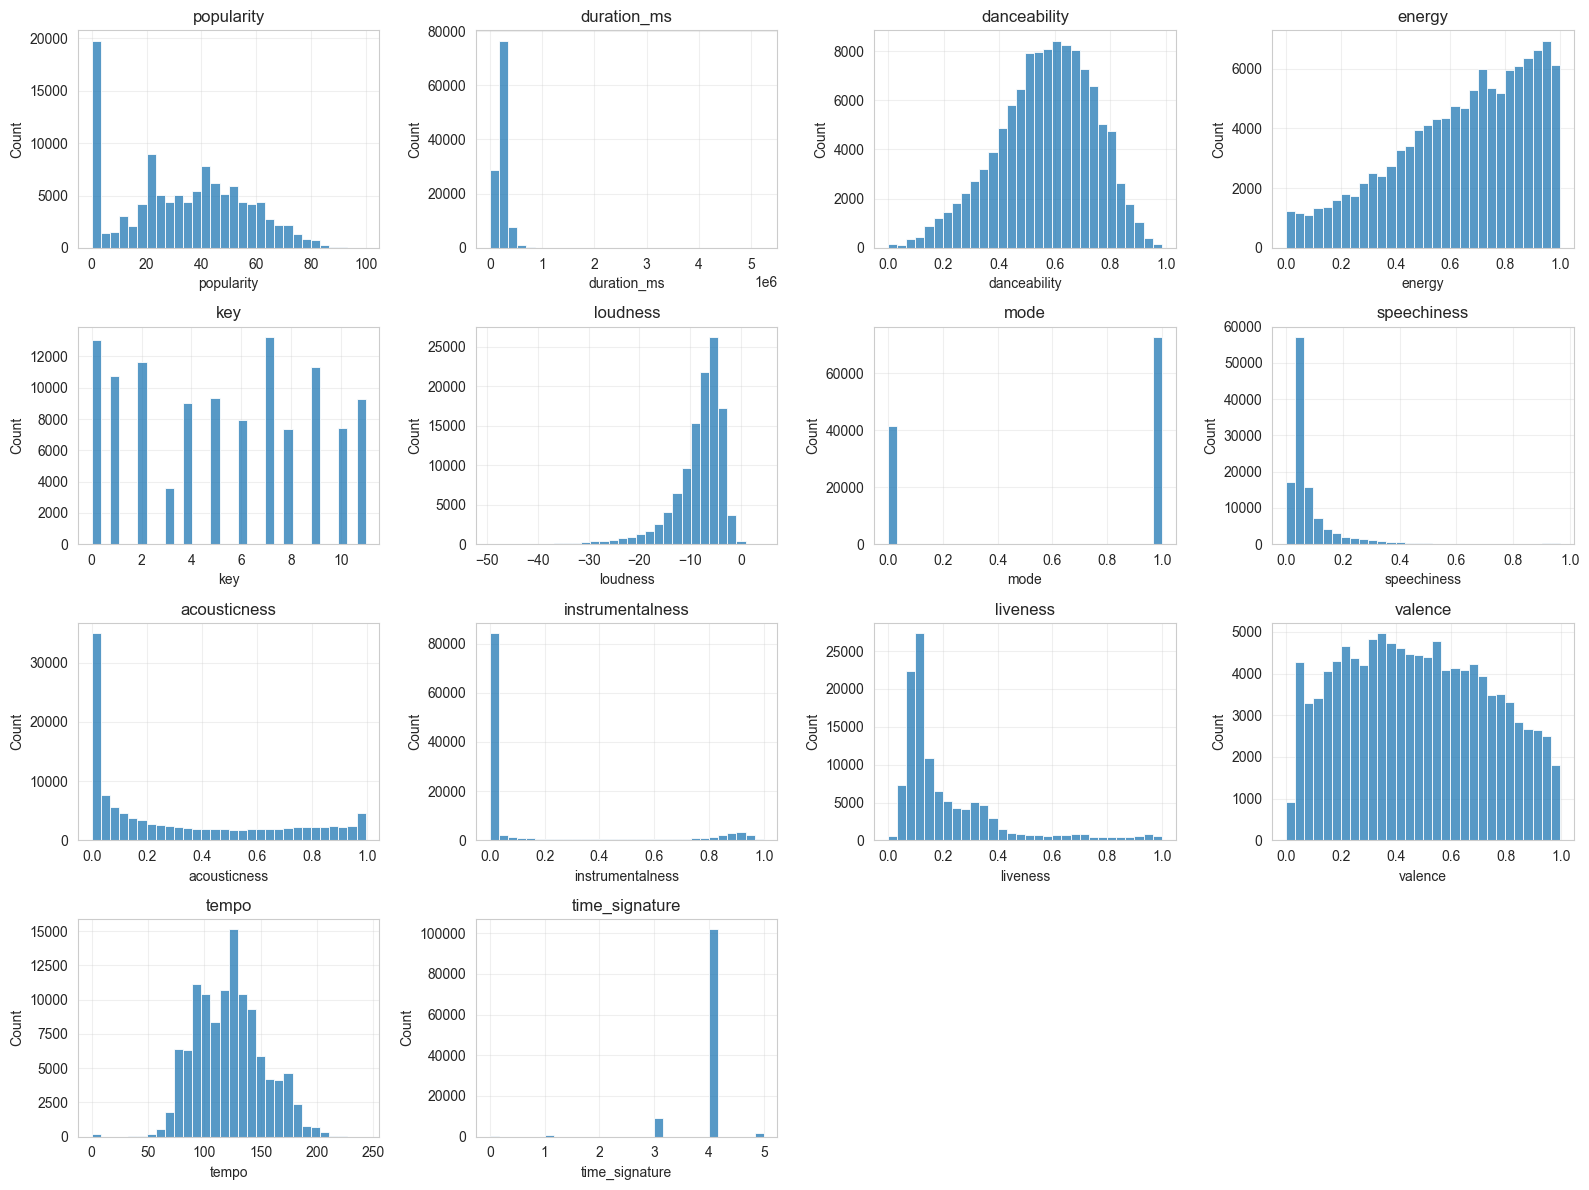

In [19]:
plot_numeric_hist_grid(df)

---

## 1.3 Exploración de los datos

### 1.3.1 Correlación entre variables numéricas

Para obtener la correlación entre cada par de variables numéricas del conjunto de datos se utilizará el [coeficiente de correlación de Pearson](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson):

$$
r=\frac{\sum (x_i-\bar{x})(y_i - \bar{y})}
{\sqrt{\sum (x_i-\bar{x})^2 \,\sum (y_i-\bar{y})^2}}
$$

donde:

- $r$ es el coeficiente de correlación entre dos variables
- $x_i, y_i$ son los valores individuales de cada variable
- $\bar{x}, \bar{y}$ son las medias aritméticas de cada variable

El coeficiente de correlacilón puede tomar valores en un rango de [-1, 1], para interpretar el resultado se utilizará la siguiente tabla como referencia:

| Valor de r               | Fuerza y tipo de correlación        |
|---------------------------|-------------------------------------|
| -1.0 ≤ r < -0.7           | Correlación muy alta negativa       |
| -0.7 ≤ r < -0.5           | Correlación alta negativa           |
| -0.5 ≤ r < -0.3           | Correlación media negativa          |
| -0.3 ≤ r < -0.1           | Poca correlación negativa           |
| -0.1 ≤ r ≤ 0.1            | No hay correlación (o muy débil)    |
| 0.1 < r ≤ 0.3             | Poca correlación positiva           |
| 0.3 < r ≤ 0.5             | Correlación media positiva          |
| 0.5 < r ≤ 0.7             | Correlación alta positiva           |
| 0.7 < r ≤ 1.0             | Correlación muy alta positiva       |

**Fuente:** Adaptado de Kuckartz et al. (2013). *Statistik: Eine verständliche Einführung*, p. 213 y https://numiqo.es/tutorial/pearson-correlation.


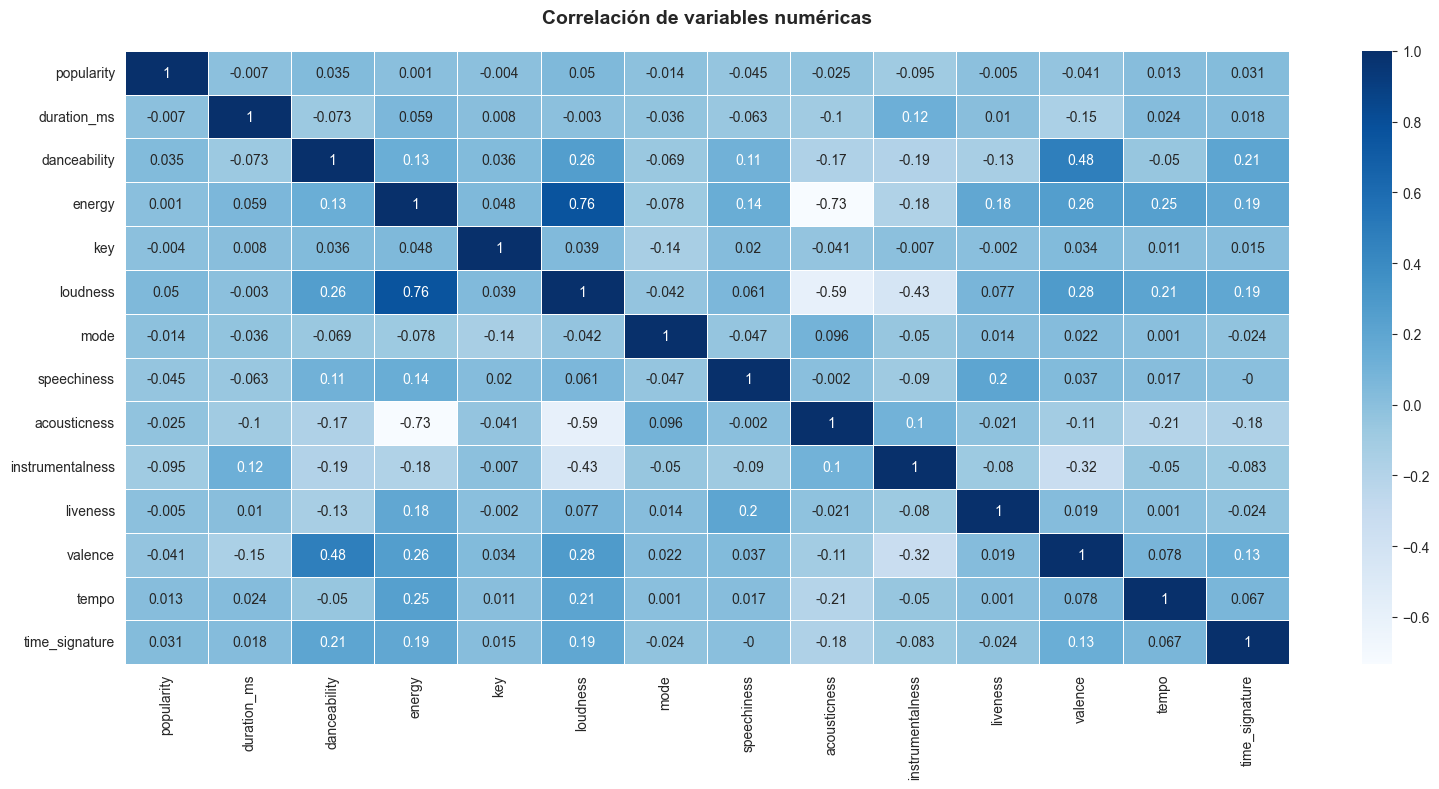

In [20]:
# Generar las correlaciones
df_num_corr = num_df.corr().round(3)

# Configuración del gráfico
plt.figure(figsize=(16, 8))

# Crear mapa de calor con los valores entre pares de variables
ax = sns.heatmap(df_num_corr, annot=True, cmap='Blues', linewidths=0.4)
ax.set_title('Correlación de variables numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#### Correlaciones positivas

Las variables positivas se pueden interpretar de la siguiente manera: cuando una variable $x$ tiende a aumentar, la otra variable $y$ también tiende a aumentar. De manera análoga, si una variable tiende a disminuir, la otra también lo hará de manera lineal. 

| Variables relacionadas     | r    | Tipo de correlación   | Interpretación                                                                                         |
|-------------------------------------------|:----:|:---------------------:|--------------------------------------------------------------------------------------------------------|
| **energy – loudness**      | 0.76 | Muy alta positiva     | Si la energía de una canción aumenta, también lo hace su nivel de volumen o intensidad sonora. Ambas variables crecen de forma conjunta, ya que la energía percibida suele reflejarse en una mayor potencia acústica. |
| **danceability – valence** | 0.48 | Media positiva        | A medida que aumenta la bailabilidad de una canción, también lo hace su positividad emocional. Es decir, las canciones más bailables tienden a ser más alegres y transmitir emociones positivas.    |
| **loudness – danceability**     | 0.26 | Baja positiva         | En cierta medida, cuando una canción presenta un volumen más alto suele ser ligeramente más bailable. Ambas variables mantienen una relación directa aunque su nivel de correlación es bajo. |
| **energy – valence**       | 0.26 | Baja positiva         | En ocasiones, las canciones más energéticas tienden a mostrar un tono emocional algo más positivo: cuando una disminuye, la otra también tiende a hacerlo. De manera contraria, las canciones con menos energía se suelen asociar a veces a estados de ánimo más relacionados con la tristeza. |
| **tempo – energy**         | 0.25 | Baja positiva         |  A mayor ritmo musical, se observa una ligera tendencia a que la energía también aumente en algunos casos. Por el contrario, cuando el tempo es lento el nivel energético de una canción refleja una tendencia a la baja. |


#### Correlaciones negativas

En cuanto a las variables negativas, la interpretación es la siguiente: cuando $x$ aumenta, la variable %y% tiende a disminuir y de manera análoga, cuando $x$ tiende a disminuir la variable $y$ tiende a aumentar. Estas correlaciones reflejan una relación inversa en la que cada variable se mueve en sentido opuesto. 

| Variables relacionadas           | r      | Tipo de correlación   | Interpretación                                                                                 |
|-------------------------------------------|:------:|:---------------------:|------------------------------------------------------------------------------------------------|
| **energy – acousticness**        | -0.73  | Muy alta negativa     | Cuanto más acústica es una canción, menos energética es. Por otro lado, cuanto menos acústica es una canción su nivel de energía tiende a crecer. Existe una fuerte relación inversamente proporcional entre estas variables.                                  |
| **loudness – acousticness**      | -0.59  | Alta negativa         | Cuando una canción es más acústica, tiende a tener un volumen más bajo. Si disminuye la acústica, el nivel de loudness aumenta. Existe una moderada relación inversamente proporcional entre estas variables.          |
| **instrumentalness – loudness**  | -0.43  | Media negativa        | Las canciones más instrumentales suelen ser menos ruidosas y, de manera contraria, canciones con menos componente instrumental suelen ser más ruidosas.                                  |
| **instrumentalness – valence**   | -0.32  | Media negativa        | A medida que aumenta la instrumentalidad, disminuye la positividad emocional. Las canciones con menos contenido instrumental suelen transmitir emociones más alegres.              |


El resto de correlaciones presentan valores muy bajos o prácticamente nulos, lo que indica que no existe una relación lineal entre las variables y, por tanto, sus valores no varían de manera conjunta. Por ejmplo, los resultados sugieren que la popularidad de una canción no depende directamente de sus características musicales, sino que puede estar condicionada por otros factores externos, como la productora, la promoción, el márqueting o el contexto social.

### 1.3.2 Visualizaciones de síntesis adicionales

Después de realizar un análisis exhaustivo de todas las variables que forman el conjunto de datos en el que se han extraído varias características como los rangos, mínimos y máximos, presencia de datos atípicos, correlación entre variables, comportamiento de las variables dentro del conjunto de datos, se procede a elaborar una serie de visualizaciones adicionales que permitirán identificar otro tipos de relaciones no vinculadas a la linealidad de los datos.

#### 1.3.2.1 Análisis por niveles de popularidad

Tal y como se ha demostrado anteriormente, la variable **popularidad** está comprendida en un rango de [0, 100]. Para facilitar el análisis basado en la popularidad de las canciones, se decide discretizar la variable en cuatro categorías:

- 0-25: escasa popularidad
- 26-50: poco popular
- 51-75: popular
- 76-100: muy popular

Según las directrices de CRISP-DM, el proceso de discretización de variables se debe realizar en la fase de preprocesamiento de datos, sin embargo, como la finalidad de ello es utilizar la nueva variable para analizar y no para el modelo, se decide abordar la operación en este punto:


In [21]:
# Se crean intervalos a partes iguales
bins = [0, 25, 50, 75, 100]
# Se asignan etiquetas
labels = ['Escasa popularidad', 'Poco popular', 'Popular', 'Muy popular']
# Se crea la nueva variable discretizada
df['popularity_bin'] = pd.cut(df['popularity'], bins=bins, labels=labels, include_lowest=True)

Una vez obtenida la variable **popularity** discretizada, se realiza un estudio adicional para visualizar su relación con el resto de variables no numéricas:

**Relación entre popularidad y variables categóricas**

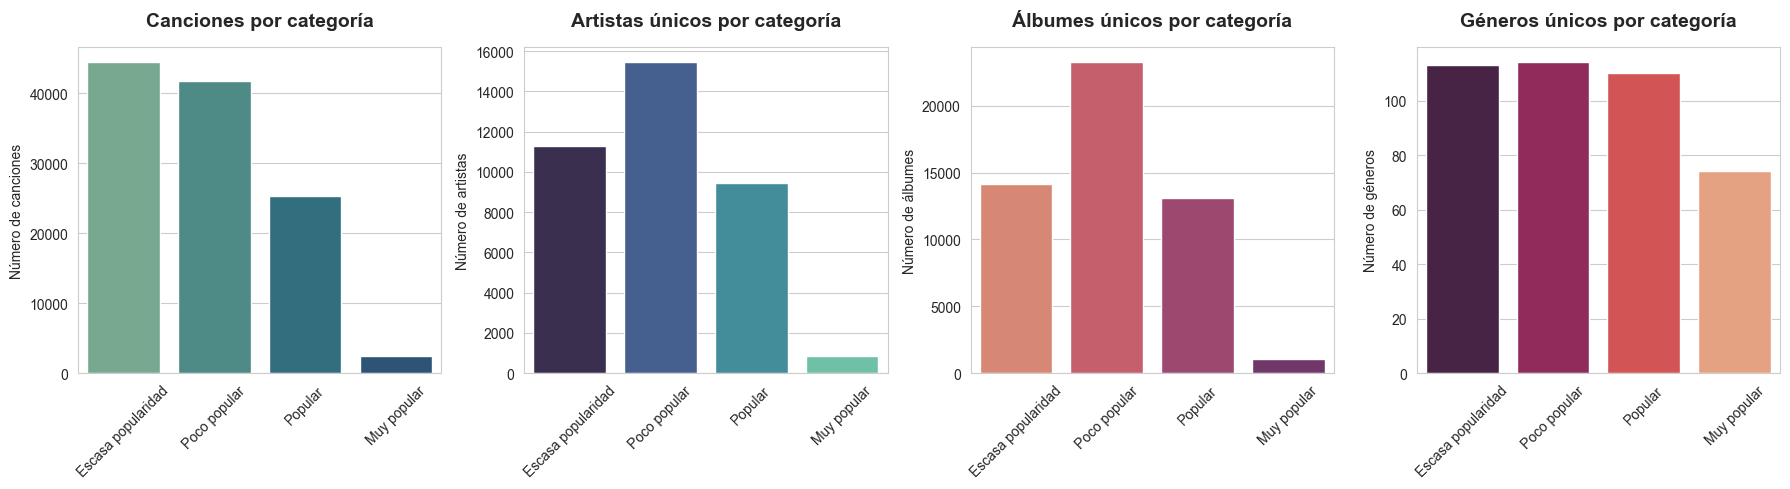

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Número canciones por categoría de popularidad
sns.countplot(x='popularity_bin', data=df, palette='crest', ax=axs[0])
axs[0].set_title('Canciones por categoría', fontsize=14, fontweight='bold', pad=15)
axs[0].set_xlabel('')
axs[0].set_ylabel('Número de canciones')
axs[0].tick_params(axis='x', rotation=45)

# Artistas únicos por categoría de popularidad
artists_by_popularity = df.groupby('popularity_bin')['artists'].nunique().reset_index()
sns.barplot(x='popularity_bin', y='artists', data=artists_by_popularity, palette='mako', ax=axs[1])
axs[1].set_title('Artistas únicos por categoría', fontsize=14, fontweight='bold', pad=15)
axs[1].set_xlabel('')
axs[1].set_ylabel('Número de artistas')
axs[1].tick_params(axis='x', rotation=45)

# Álbumes únicos por categoría de popularidad
albums_by_popularity = df.groupby('popularity_bin')['album_name'].nunique().reset_index()
sns.barplot(x='popularity_bin', y='album_name', data=albums_by_popularity, palette='flare', ax=axs[2])
axs[2].set_title('Álbumes únicos por categoría', fontsize=14, fontweight='bold', pad=15)
axs[2].set_xlabel('')
axs[2].set_ylabel('Número de álbumes')
axs[2].tick_params(axis='x', rotation=45)

# Géneros únicos por categoría de popularidad
genres_by_popularity = df.groupby('popularity_bin')['track_genre'].nunique().reset_index()
sns.barplot(x='popularity_bin', y='track_genre', data=genres_by_popularity, palette='rocket', ax=axs[3])
axs[3].set_title('Géneros únicos por categoría', fontsize=14, fontweight='bold', pad=15)
axs[3].set_xlabel('')
axs[3].set_ylabel('Número de géneros')
axs[3].tick_params(axis='x', rotation=45)

# Eliminar leyendas

plt.tight_layout()
plt.show()


Los hechos que se observan en las visualizaciones anteriores son los siguientes:

- Tal y como se apreciaba en la gráfica de distribución de la variable *popularity*, el número de canciones con valores cercanos a cero es considerablemente alto. Con esta variable discretizada se puede observar un sesgo relevante que debe tenerse en cuenta durante el análisis exploratorio del dataset.

- La variedad de artistas también se concentra en los niveles bajos de popularidad, lo que sugiere que la popularidad no depende únicamente del número de artistas, sino del impacto de unos pocos artistas con una gran presencia en las listas.

- Siguiendo esta misma tendencia, la cantidad de álbumes únicos por nivel de popularidad muestra el mismo desequilibrio: los álbumes muy populares son pocos frente a los que presentan menor éxito.

- A pesar de este sesgo entre popularidad y número de canciones, artistas y álbumes, la diversidad de géneros se mantiene relativamente alta incluso en los niveles inferiores de popularidad. Este resultado sugiere que la variedad musical no garantiza necesariamente una mayor difusión o éxito comercial.

**Relación entre popularidad - explicit y popularidad - mode** 

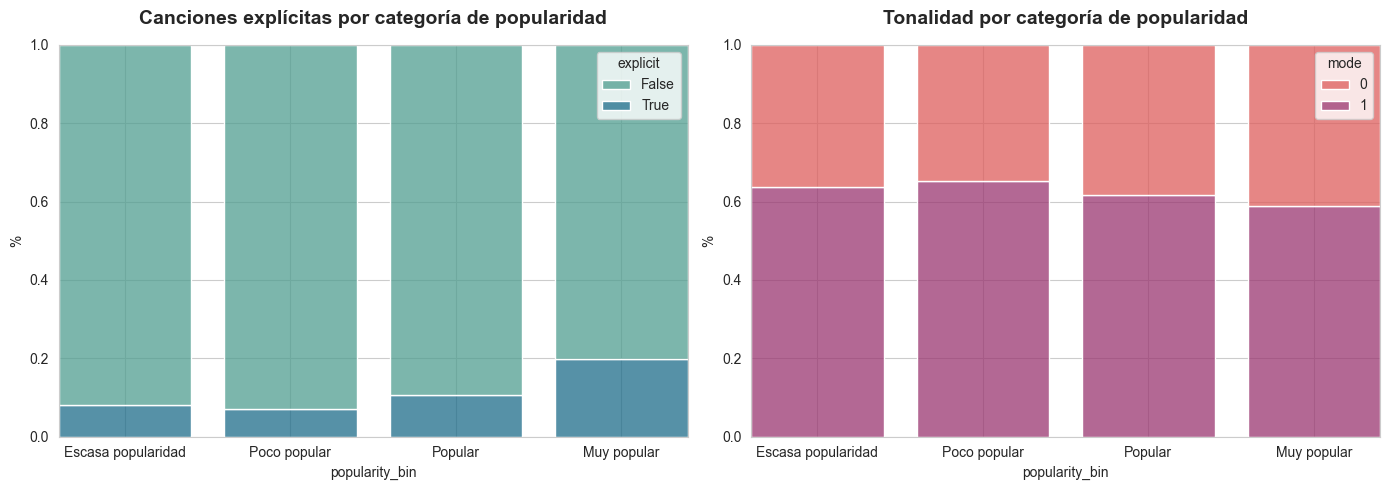

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x='popularity_bin', hue='explicit', multiple='fill',   shrink=0.8, ax=axs[0], palette='crest')
axs[0].set_title('Canciones explícitas por categoría de popularidad', fontsize=14, fontweight='bold', pad=15)
axs[0].set_ylabel('%')

sns.histplot(data=df, x='popularity_bin', hue='mode', multiple='fill',   shrink=0.8, ax=axs[1], palette='flare')
axs[1].set_title('Tonalidad por categoría de popularidad', fontsize=14, fontweight='bold', pad=15)
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()

Los resultados de ambas visualizaciones muestran que ni la característica relacionada con el contenido explícito ni la tonalidad de las canciones ejercen una influencia clara sobre su nivel de popularidad. No obstante, resulta interesante observar que, dentro del grupo de canciones más populares, existe un porcentaje ligeramente superior de temas con contenido explícito en comparación con aquellas de menor popularidad.

En definitiva, como era de esperar, las características que definen la música no influyen directamente sobre el nivel de popularidad de una canción. Se ha demostrado que tanto las variables numéricas, así como las categóricas y binarias no presentan una correlación con la popularidad de las canciones.


#### 1.3.2.2 Análisis de características musicales por género

A continuación se analiza cómo se distribuyen diferentes características musicales entre los géneros del conjunto de datos. Este análisis permite identificar qué géneros presentan valores más altos o más bajos en cada par de variables para comprender el conjunto de datos antes de aplicar técnicas de *clustering* basadas en características musicales.

##### Energy por género


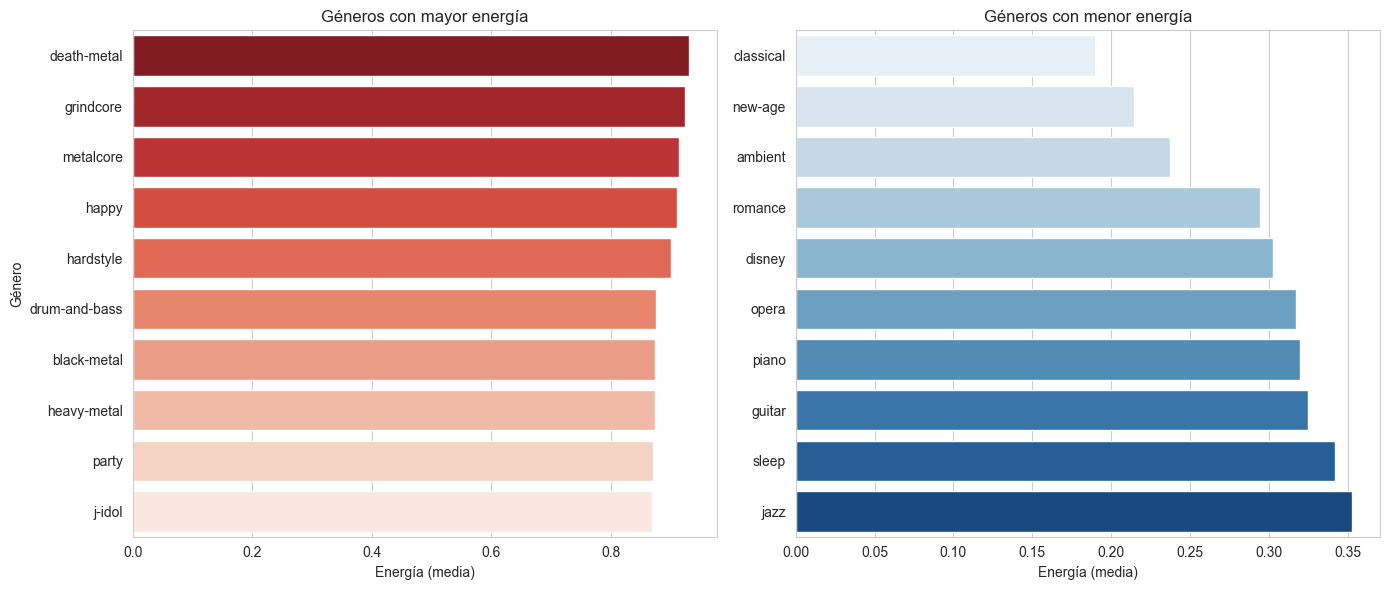

In [24]:
# Calculamos la energía media por género
energy_ratio_by_genre = df.groupby('track_genre')['energy'].mean().reset_index()

# Obtenemos los 10 géneros con mayor y menor energía
top10_energy_genres = energy_ratio_by_genre.nlargest(10, 'energy')
low10_energy_genres = energy_ratio_by_genre.nsmallest(10, 'energy')

# Creamos los gráficos de barras
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=top10_energy_genres, x='energy', y='track_genre', palette='Reds_r', ax=axs[0])
axs[0].set_title('Géneros con mayor energía')
axs[0].set_xlabel('Energía (media)')
axs[0].set_ylabel('Género')

sns.barplot(data=low10_energy_genres, x='energy', y='track_genre', palette='Blues', ax=axs[1])
axs[1].set_title('Géneros con menor energía')
axs[1].set_xlabel('Energía (media)')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()



En las gráficas anteriortes se observa que estilos como death-metal, grindcore o hardstyle destacan por su alta intensidad sonora, mientras que géneros como classical, ambient o jazz presentan niveles de energía mucho más bajos, asociados a composiciones más suaves.

##### Danceability por género


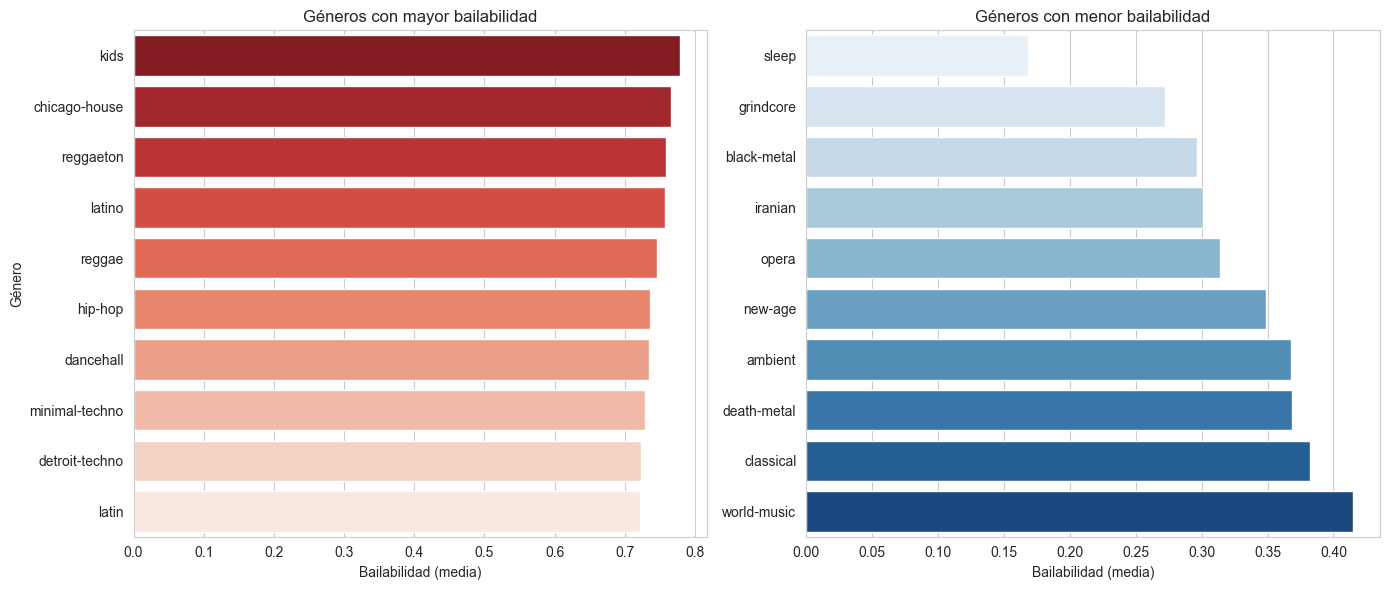

In [25]:
# Calculamos la bailabilidad media por género
danceability_by_genre = df.groupby('track_genre')['danceability'].mean().reset_index()

# Obtenemos los 10 géneros con mayor y menor bailabilidad
top10_danceability_genres = danceability_by_genre.nlargest(10, 'danceability')
low10_danceability_genres = danceability_by_genre.nsmallest(10, 'danceability')

# Creamos los gráficos de barras
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=top10_danceability_genres, x='danceability', y='track_genre', palette='Reds_r', ax=axs[0])
axs[0].set_title('Géneros con mayor bailabilidad')
axs[0].set_xlabel('Bailabilidad (media)')
axs[0].set_ylabel('Género')

sns.barplot(data=low10_danceability_genres, x='danceability', y='track_genre', palette='Blues', ax=axs[1])
axs[1].set_title('Géneros con menor bailabilidad')
axs[1].set_xlabel('Bailabilidad (media)')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


Los resultados muestran qué géneros presentan mayor y menor bailabilidad promedio. Este análisis permite comprender qué estilos musicales son más adecuados para el baile según sus características rítmicas y de regularidad.


##### Valence por género


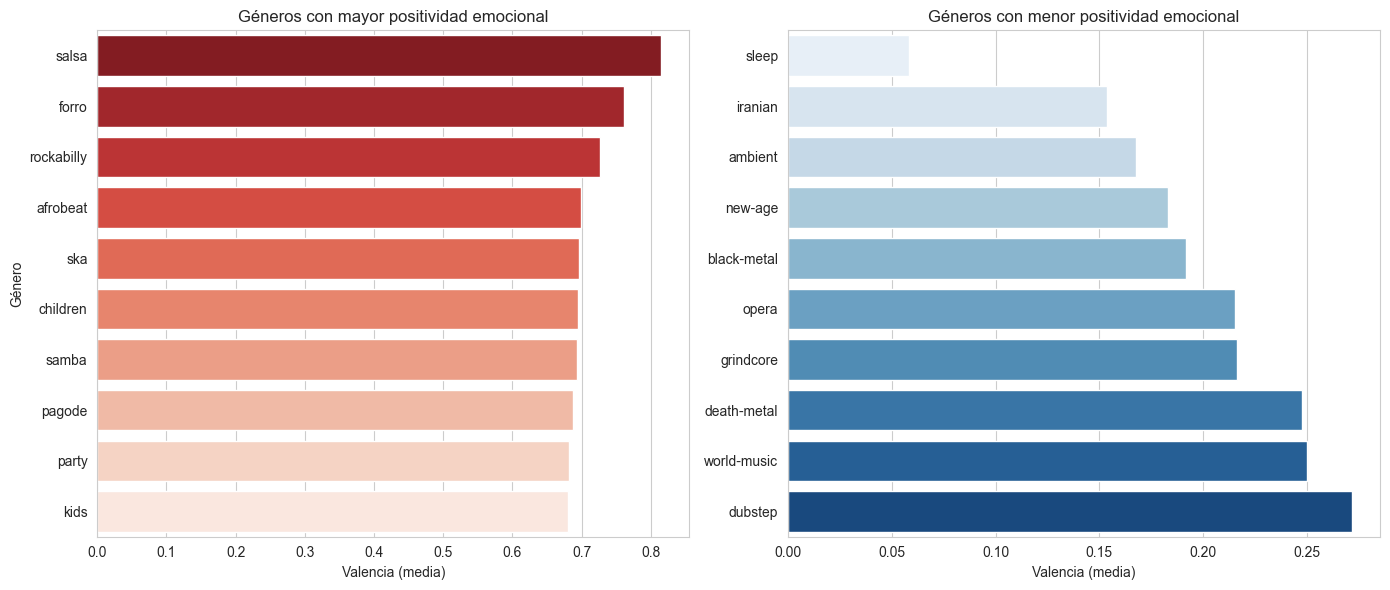

In [26]:
# Calculamos la valencia media por género
valence_by_genre = df.groupby('track_genre')['valence'].mean().reset_index()

# Obtenemos los 10 géneros con mayor y menor positividad emocional
top10_valence_genres = valence_by_genre.nlargest(10, 'valence')
low10_valence_genres = valence_by_genre.nsmallest(10, 'valence')

# Creamos los gráficos de barras
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=top10_valence_genres, x='valence', y='track_genre', palette='Reds_r', ax=axs[0])
axs[0].set_title('Géneros con mayor positividad emocional')
axs[0].set_xlabel('Valencia (media)')
axs[0].set_ylabel('Género')

sns.barplot(data=low10_valence_genres, x='valence', y='track_genre', palette='Blues', ax=axs[1])
axs[1].set_title('Géneros con menor positividad emocional')
axs[1].set_xlabel('Valencia (media)')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


En este caso se tiene, por un lado, los géneros con un nivel emocional más dirigida aestados positivos frente a los géneros con un perfil emocional más negativo.



##### Acousticness por género


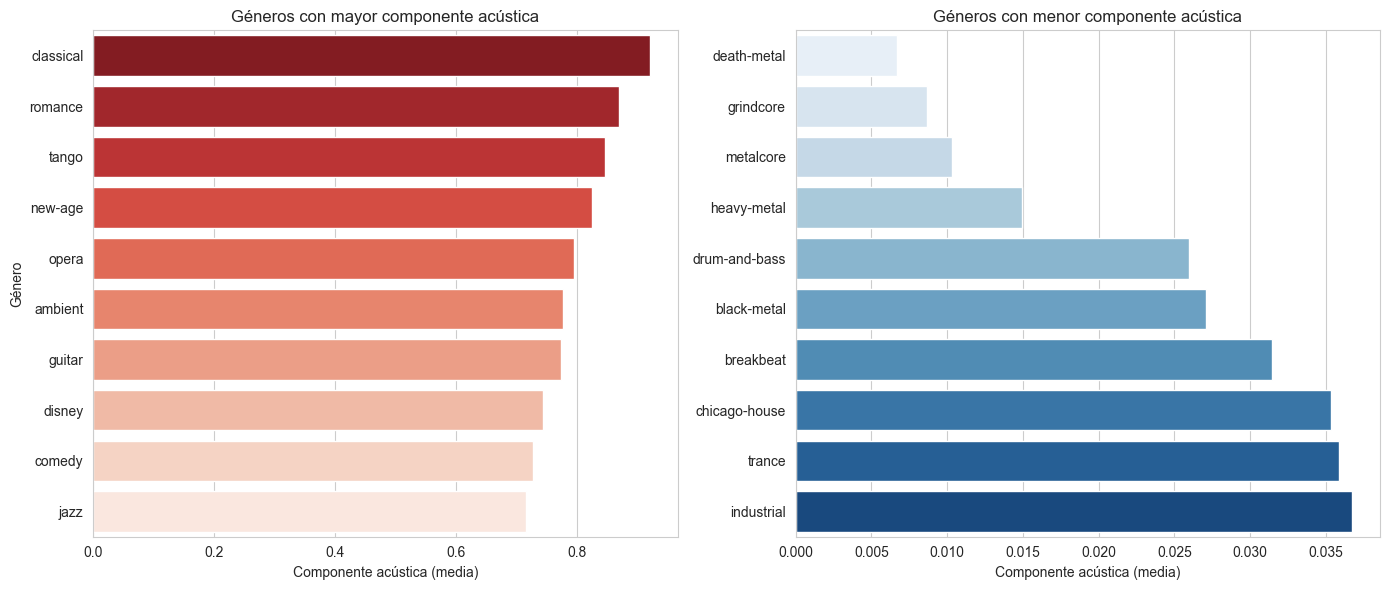

In [27]:
# Calculamos la componente acústica media por género
acousticness_by_genre = df.groupby('track_genre')['acousticness'].mean().reset_index()

# Obtenemos los 10 géneros con mayor y menor componente acústica
top10_acousticness_genres = acousticness_by_genre.nlargest(10, 'acousticness')
low10_acousticness_genres = acousticness_by_genre.nsmallest(10, 'acousticness')

# Creamos los gráficos de barras
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=top10_acousticness_genres, x='acousticness', y='track_genre', palette='Reds_r', ax=axs[0])
axs[0].set_title('Géneros con mayor componente acústica')
axs[0].set_xlabel('Componente acústica (media)')
axs[0].set_ylabel('Género')

sns.barplot(data=low10_acousticness_genres, x='acousticness', y='track_genre', palette='Blues', ax=axs[1])
axs[1].set_title('Géneros con menor componente acústica')
axs[1].set_xlabel('Componente acústica (media)')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


Los resultados muestran qué géneros presentan mayor y menor componente acústica promedio, identificando estilos más acústicos frente a producciones con un perfil más electrónico.


##### Tempo por género


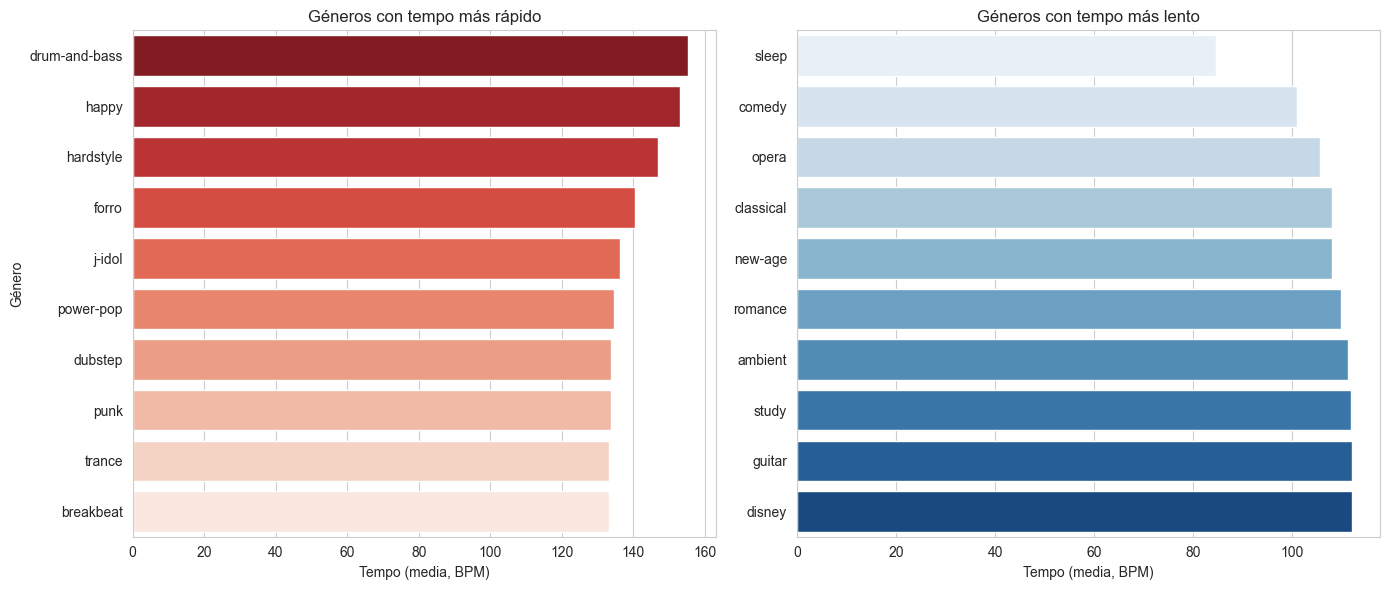

In [28]:
# Calculamos el tempo medio por género
tempo_by_genre = df.groupby('track_genre')['tempo'].mean().reset_index()

# Obtenemos los 10 géneros con tempo más rápido y más lento
top10_tempo_genres = tempo_by_genre.nlargest(10, 'tempo')
low10_tempo_genres = tempo_by_genre.nsmallest(10, 'tempo')

# Creamos los gráficos de barras
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=top10_tempo_genres, x='tempo', y='track_genre', palette='Reds_r', ax=axs[0])
axs[0].set_title('Géneros con tempo más rápido')
axs[0].set_xlabel('Tempo (media, BPM)')
axs[0].set_ylabel('Género')

sns.barplot(data=low10_tempo_genres, x='tempo', y='track_genre', palette='Blues', ax=axs[1])
axs[1].set_title('Géneros con tempo más lento')
axs[1].set_xlabel('Tempo (media, BPM)')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


El gráfico muestra los géneros con los valores medios de tempo (BPM) más altos y más bajos. Se observa que estilos como drum-and-bass, hardstyle o punk presentan los ritmos más rápidos, caracterizados por una mayor intensidad y dinamismo. En cambio, géneros como sleep, opera o ambient destacan por tempos más lentos, asociados a composiciones relajadas o de carácter más introspectivo.

#### 1.3.2.3 Exploración de las relaciones entre características musicales para detectar similitudes entre géneros

Para comprender mejor cómo se distribuyen las canciones en el espacio de características y visualizar el solapamiento entre géneros diferentes, se decide crear scatter plots de las combinaciones de variables más relevantes según las correlaciones identificadas anteriormente. Estos gráficos permitirán observar qué géneros distintos pueden compartir características similares sin que influya la popularidad o el propio género.

##### Análisis de similitudes entre géneros: Energy vs Acousticness


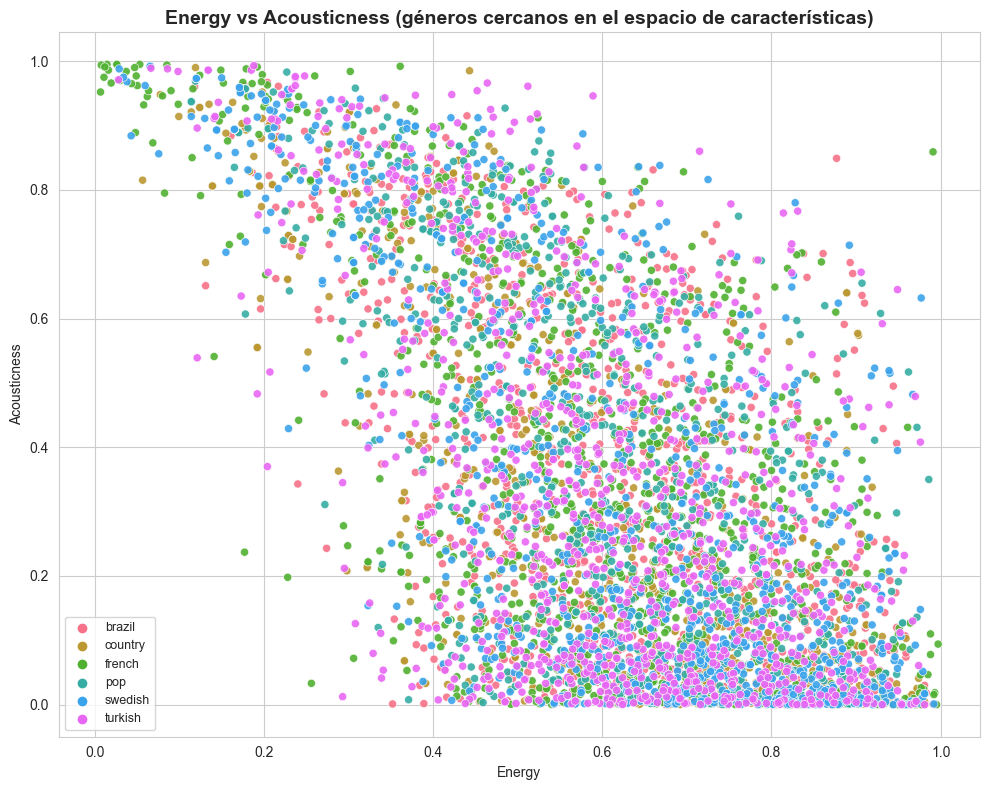

In [29]:
# Calculamos las medias por género
genre_stats = df.groupby('track_genre')[['energy', 'acousticness']].mean().reset_index()

# Seleccionamos 'pop' como género de referencia y encontramos otros cercanos en el espacio usando distancia euclidiana
target = genre_stats[genre_stats['track_genre'] == 'pop'][['energy', 'acousticness']].values[0]
genre_stats['distance'] = np.linalg.norm(
    genre_stats[['energy', 'acousticness']].values - target, axis=1
)
genres_near_pop = genre_stats.nsmallest(6, 'distance')['track_genre'].tolist()

# Creamos el scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

df_selected = df[df['track_genre'].isin(genres_near_pop)]
sns.scatterplot(data=df_selected, x='energy', y='acousticness', 
                hue='track_genre', palette='husl', alpha=0.9, s=35, ax=ax)

ax.set_xlabel('Energy')
ax.set_ylabel('Acousticness')
ax.set_title('Energy vs Acousticness (géneros cercanos en el espacio de características)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=9, title='')

plt.tight_layout()
plt.show()


Los gráficos muestran géneros diferentes que están cercanos entre sí en el espacio energy-acousticness. Estos resultados demuestran que géneros distintos pueden compartir perfiles similares de energía y acústica. El agrupamiento a partir de características musicales permite identificar canciones de distintos géneros que comparten un mismo espacio sonoro, este hecho ayuda a superar las fronteras entre estilos y a generar recomendaciones más variadas.


##### Análisis de similitudes entre géneros: Energy vs Valence

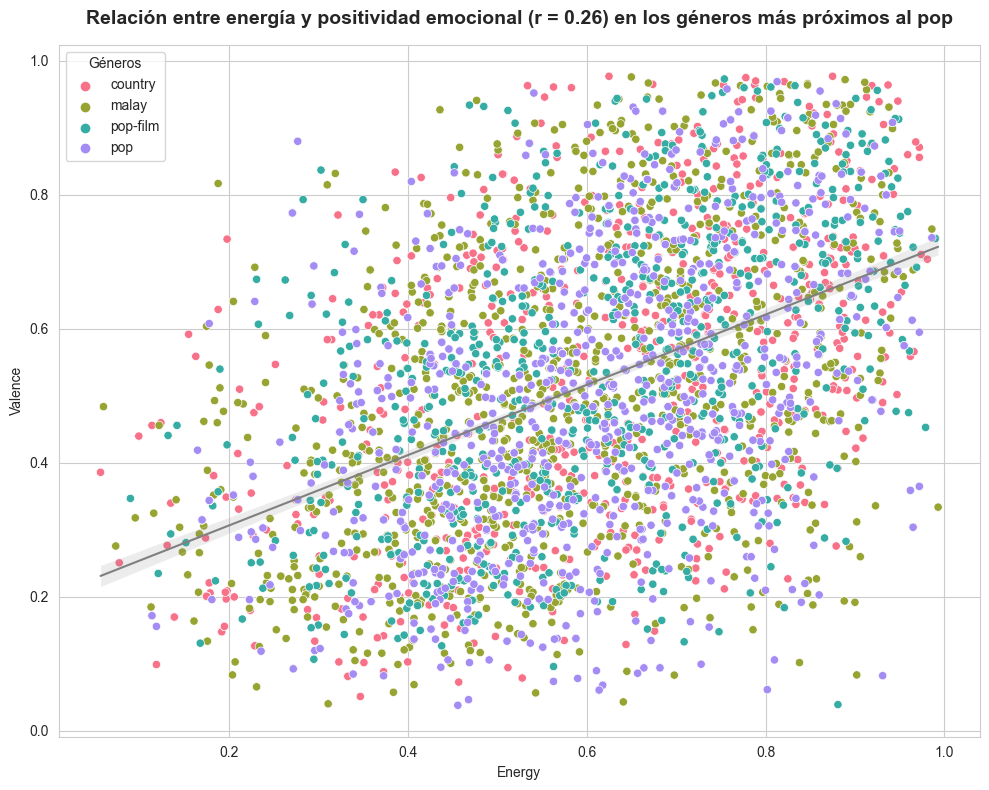

In [30]:
# Calculamos las medias por género
genre_stats = df.groupby('track_genre')[['energy', 'valence']].mean().reset_index()

# Seleccionamos 'pop' como género de referencia y encontramos otros géneros cercanos a pop mediante la distancia
pop_stats = genre_stats[genre_stats['track_genre'] == 'pop'][['energy', 'valence']].values[0]
genre_stats['dist'] = np.linalg.norm(genre_stats[['energy', 'valence']].values - pop_stats, axis=1)
# Cogemos los 4 géneros más cercanos
genres_near_pop = genre_stats.nsmallest(4, 'dist')['track_genre'].tolist()

# Creamos el scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

df_near_pop = df[df['track_genre'].isin(genres_near_pop)]
# Gráfico de puntos
sns.scatterplot(data=df_near_pop, x='energy', y='valence', hue='track_genre', palette='husl', ax=ax)

# Regresión lineal para visualizar la tendencia de la relación entre características 
sns.regplot(data=df_near_pop, x='energy', y='valence', scatter=False, ax=ax, color='gray', line_kws={'linewidth': 1.5})

ax.set_xlabel('Energy')
ax.set_ylabel('Valence')
ax.set_title('Relación entre energía y positividad emocional (r = 0.26) en los géneros más próximos al pop', fontsize=14, fontweight='bold', pad = 15)
ax.legend(loc='best', title='Géneros')

plt.tight_layout()
plt.show()


En este caso se muestra una tendencia positiva entre la energía y la positividad emocional de las canciones que pertenecen a los géneros más cercanos al pop (country, malay, pop-film). Aunque la correlación es moderada (r = 0.26), se observa que las canciones con mayor energía tienden a asociarse con un tono emocional más positivo. Además, otro hecho que se observa es que la alta dispersión de los datos demeustra que los cuatro géneros reflejan una diversidad en cuanto a la expresividad de los composiciones. Asimismo, el solapamiento entre géneros sugiere que estilos musicales distintos pueden compartir características emocionales y dinámicas similares.

##### Análisis de similitudes entre géneros: Danceability vs Valence


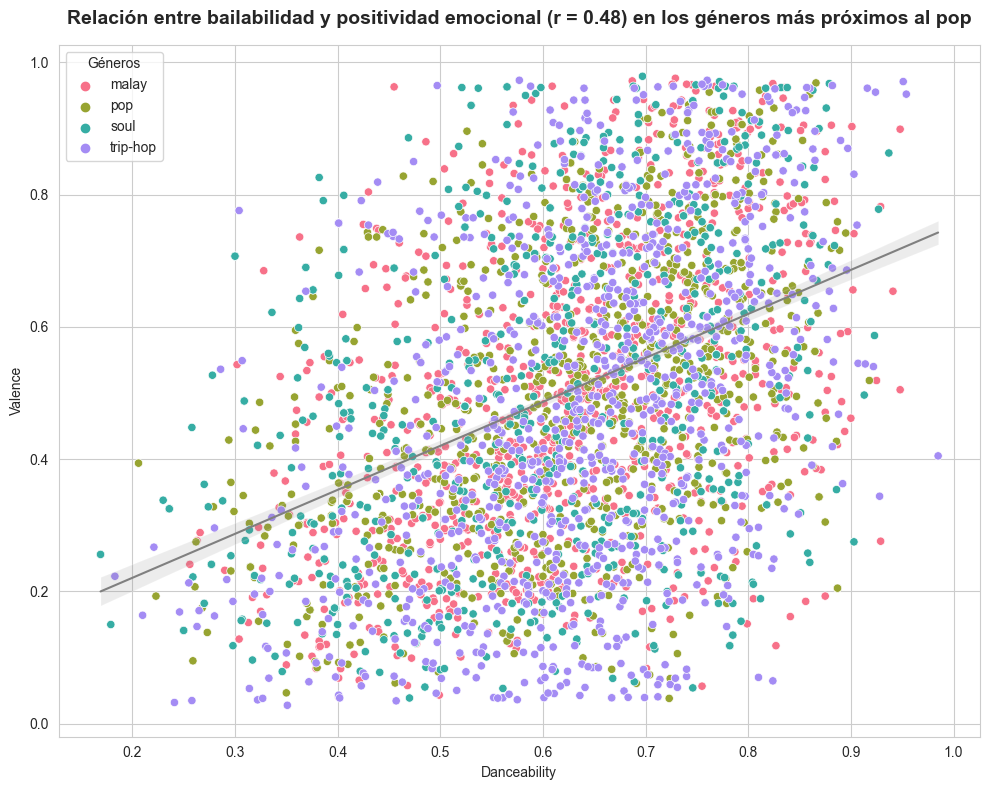

In [31]:
# Calculamos las medias por género
genre_stats = df.groupby('track_genre')[['danceability', 'valence']].mean().reset_index()

# Seleccionamos 'pop' como género de referencia y encontramos otros géneros cercanos a pop mediante la distancia
pop_stats = genre_stats[genre_stats['track_genre'] == 'pop'][['danceability', 'valence']].values[0]
genre_stats['dist'] = np.linalg.norm(genre_stats[['danceability', 'valence']].values - pop_stats, axis=1)
# Cogemos los 4 géneros más cercanos
genres_near_pop = genre_stats.nsmallest(4, 'dist')['track_genre'].tolist()

# Creamos el scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

df_near_pop = df[df['track_genre'].isin(genres_near_pop)]
# Gráfico de puntos
sns.scatterplot(data=df_near_pop, x='danceability', y='valence', hue='track_genre', palette='husl', ax=ax)

# Regresión lineal para visualizar la tendencia de la relación entre características 
sns.regplot(data=df_near_pop, x='danceability', y='valence', scatter=False, ax=ax, color='gray', line_kws={'linewidth': 1.5})

ax.set_xlabel('Danceability')
ax.set_ylabel('Valence')
ax.set_title('Relación entre bailabilidad y positividad emocional (r = 0.48) en los géneros más próximos al pop', fontsize=14, fontweight='bold', pad = 15)
ax.legend(loc='best', title='Géneros')

plt.tight_layout()
plt.show()


Este gráfico muestra la relación entre la bailabilidad y la positividad emocional (valence) de los géneros musicales. La correlación entre variables es de r = 0.48, lo que indica que las canciones más bailables tienden a transmitir emociones más positivas, en contraposición a aquellas con menor bailabilidad, que suelen reflejar emociones más tristes. Los géneros seleccionados comparten perfiles similares en estas dos características, lo que demuestra nuevamente que géneros distintos pueden ocupar regiones cercanas al género target en el espacio bidimensional.


##### Análisis de similitudes entre géneros: Loudness vs Acousticness


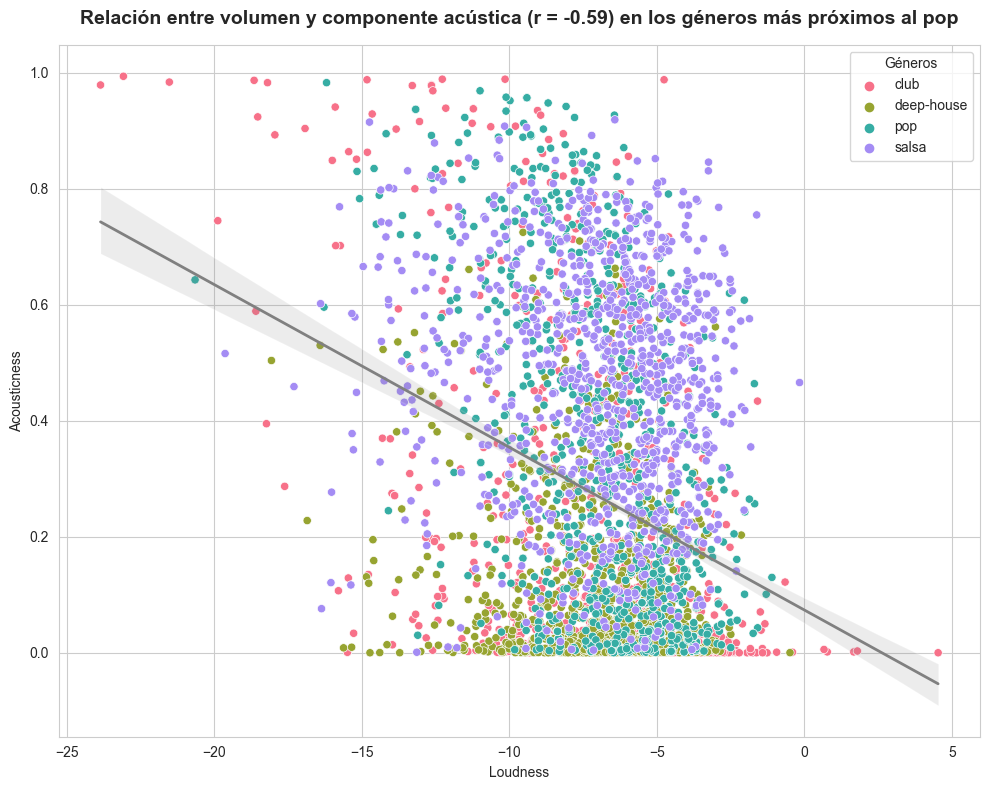

In [32]:
# Calculamos las medias por género
genre_stats = df.groupby('track_genre')[['loudness', 'acousticness']].mean().reset_index()

# Seleccionamos 'pop' como género de referencia y encontramos otros géneros cercanos a pop mediante la distancia
pop_stats = genre_stats[genre_stats['track_genre'] == 'pop'][['loudness', 'acousticness']].values[0]
genre_stats['dist'] = np.linalg.norm(genre_stats[['loudness', 'acousticness']].values - pop_stats, axis=1)
# Cogemos los 4 géneros más cercanos
genres_near_pop = genre_stats.nsmallest(4, 'dist')['track_genre'].tolist()

# Creamos el scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

df_near_pop = df[df['track_genre'].isin(genres_near_pop)]
# Gráfico de puntos
sns.scatterplot(data=df_near_pop, x='loudness', y='acousticness', hue='track_genre', palette='husl', ax=ax)
# Regresión lineal para visualizar la tendencia de la relación entre características 
sns.regplot(data=df_near_pop, x='loudness', y='acousticness', scatter=False, ax=ax, color='gray', line_kws={'linewidth': 2})

ax.set_xlabel('Loudness')
ax.set_ylabel('Acousticness')
ax.set_title('Relación entre volumen y componente acústica (r = -0.59) en los géneros más próximos al pop', fontsize=14, fontweight='bold', pad = 15)
ax.legend(loc='best', title='Géneros')

plt.tight_layout()
plt.show()


Como se analizó anteriormente, estas dos variables presentan una correlación negativa moderada (r = -0.59) ya que que las canciones más acústicas tienden a tener un volumen más bajo, mientras que las producciones con matices más de música electrónica suelen tener un nivel de volumen más alto. Se podría decir que el género pop es muy similar al deep-house, club o salsa en relación con su nivel de sonoridad y la acústica de sus producciones. 


##### Análisis de similitudes entre géneros: Energy vs Loudness


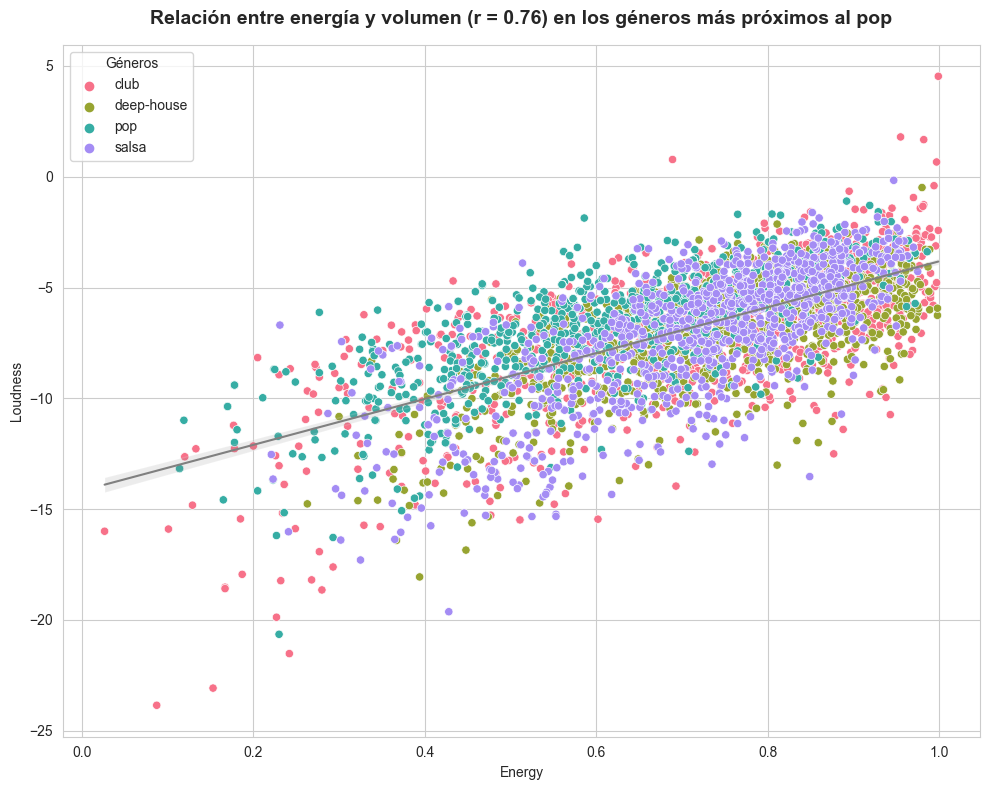

In [33]:
# Calculamos las medias por género
genre_stats = df.groupby('track_genre')[['energy', 'loudness']].mean().reset_index()

# Seleccionamos 'pop' como género de referencia y encontramos otros géneros cercanos a pop mediante la distancia
pop_stats = genre_stats[genre_stats['track_genre'] == 'pop'][['energy', 'loudness']].values[0]
genre_stats['dist'] = np.linalg.norm(genre_stats[['energy', 'loudness']].values - pop_stats, axis=1)
# Cogemos los 4 géneros más cercanos
genres_near_pop = genre_stats.nsmallest(4, 'dist')['track_genre'].tolist()

# Creamos el scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

df_near_pop = df[df['track_genre'].isin(genres_near_pop)]
# Gráfico de puntos
sns.scatterplot(data=df_near_pop, x='energy', y='loudness', hue='track_genre', palette='husl', ax=ax)

# Regresión lineal para visualizar la tendencia de la relación entre características 
sns.regplot(data=df_near_pop, x='energy', y='loudness', scatter=False, ax=ax, color='gray', line_kws={'linewidth': 1.5})

ax.set_xlabel('Energy')
ax.set_ylabel('Loudness')
ax.set_title('Relación entre energía y volumen (r = 0.76) en los géneros más próximos al pop', fontsize=14, fontweight='bold', pad = 15)
ax.legend(loc='best', title='Géneros')

plt.tight_layout()
plt.show()


Y, por último, se procede a analizar la relación entre energy y loudness con una correlación muy alta positiva (r = 0.76). Se puede visualizarlar que las canciones más energéticas tienden a tener un volumen más alto, y viceversa. Esta relación casi lineal sugiere que estas dos variables capturan información muy similar sobre las características musicales. 

**Nota importante para la fase de preparación de datos:** Dada la alta correlación entre *energy* y *loudness* y el solapamiento que presenta, se recomienda excluir una de estas variables en el modelo de clustering para reducir la redundancia y evitar que estas variables dominen las distancias que se utilicen en K-means o afecten desproporcionadamente en los centroides o densidades de DBSCAN. Se sugiere mantener *energy* y excluir *loudness*, ya que *energy* es más interpretable en cuanto a concepto y captura mejor la percepción de intensidad musical.

--- 

## 1.4 Conclusión del EDA

En esta última etapa de la fase de comprensión de los datos se procede a identificar los aspectos más relevantes encontrados en el EDA.

### 1.4.1 Estructura y calidad del dataset

El primer paso que se ha realizado es un estudio exhaustivo de la estructura del conjunto de datos Spotify Tracks Dataset. En esta primera fase se ha detectado que el conjunto de datos está formado por unas 114000 observaciones aproximadamente de las cuales se definen para cada una de ellas 21 variables. De todas estas variables se encuentran 5 categóricas que describen de manera identificativa el nombre del *track*, quién lo compuso, el álbum al que pertecene, un identificador único del registro en Spotify y el género al que pertenece. Por otro lado, también se ha descrito el resto de variables más enfocadas a las características o rasgos del track como la energía, la bailabilidad, el tempo, la positividad emocional entre otros. Cabe destacar que el conjunto de datos cuenta con una variable booleana que indica si el *track* es explícito o no, además, a pesar de que **la tonalidad (mode) se comporte como una variable numérica que toma valores 0 o 1, se la considerará variable booleana**. Este aspecto será tratado en la siguiente fase de preprocesamiento de datos.

### 1.4.2 Estadísticas descriptivas

El primer hecho que se ha podido observar en esta segunda fase de exploración y que puede generar cierta preocupación es que la variable **duration_ms toma valores extremadamente altos** en comparación el resto de variables. Esta diferencia de escala podría **afectar negativamente al rendimiento de los algoritmos de *clustering***, ya que las variables con rangos mayores tienden a dominar las distancias en el espacio de características. Por este motivo, será necesario aplicar una normalización o estandarización previa para asegurar que todas las variables seleccionadas como candidatas contribuyan de manera equilibrada al proceso de agrupamiento.

Por otro lado, el resto de variables cuantitativas excepto popularity y tempo están comprendidas dentro del rango [0, 1] y los valores que toman se consideran normales. Sin embargo, se ha detectado que tanto la variable key, como time_signature representan atributos de tipo categórico codificados numéricamente. En el caso de key, los valores indican la tonalidad musical de la canción (por ejemplo, Do, Re, Mi, etc.), mientras que time_signature hace referencia al compás. Al contar con una multitud de variables numéricas que describen las características de los *tracks*, se podría valorar excluir estas variables del conjunto de datos, sin embargo, se decide no hacerlo para observar como se comportan los algoritmos a la hora de generar los clústeres.

### 1.4.3 Distribuciones y forma de las variables

Llegados a este punto, se ha decidido calcular el coeficiente de asimetría y la curtosis de cada variable con el objetivo de complementar los gráficos de distribución y obtener una visión más completa sobre la forma de las distribuciones. Estos indicadores permiten identificar si los datos presentan sesgos hacia alguno de los extremos o si muestran una concentración excesiva en torno a la media. Se ha observado que la mayoría de variables no siguen una distribución normal de Gauss, lo que ha permitido identificar múltiples sesgos positivos y negativos entorno al conjunto de datos. En ocasiones, esta asimetría aparecía en consecuencia de la presencia de múltiples *outliers*, sin embargo, en otras escenarios como es el caso de *energy* y *acousticness*, se ha visto que a pesar de no contener datos atípicos la distribución queda sesgada debido a la naturaleza de los datos.

Por otro lado, se ha demostrado que algunas variables como duration_ms, *loudness*, *speechiness*, *instrumentalness* o *liveness* presentan una gran cantidad de valores atípicos. Se ha considerado no tratar en la siguiente fase ya que los *outliers* en este caso explican la naturaleza del propio *track* tal y como se ha mencionado anteriormente. Por ejemplo, en el caso de la variable duration_ms, los registros pueden tener una duración extremadamente larga ya que puede que sean podcasts, grabaciones de sesiones en vivo entre otros. Así pues, una duración de 80 minutos puede ser posible aunque parezca que la duración debería rondar un valor aproximadamente de 3 o 4 minutos. Para reforzar esta justificación, se podría considerar en este punto la variable *instrumentalness* como una medida para definir la presencia de instrumentos en un track *track*. El rango intercuartílico no llega ni a un valor Q3 = 0.1 (10%) ya que prácticamente todas las canciones suelen contener instrumentos. Sin embargo, también se destaca un porcentaje elevado de canciones que pueden estar compuestas por menos instrumentos incluso sin ninguno. Por lo tanto, **se considera que todos los valores atípicos explican la naturaleza de los datos y son interesantes de mantener para este proyecto por lo que no se eliminarán ni modificarán**.


### 1.4.4 Correlaciones relevantes identificadas

Para analizar el grado de correlación entre las variables cuantitativas del conjunto de datos se ha utilizado el coeficiente de correlación de Pearson, que permite medir la relación lineal entre dos variables. Los resultados muestran la existencia de correlaciones tanto positivas como negativas entre distintos pares de variables. Las correlaciones más significativas son:

- Energy y Loudness (r = 0.76): presentan una correlación positiva fuerte. Este hecho indica que las canciones con mayor nivel de energía suelen registrar también un volumen más alto. Este resultado es coherente con la naturaleza de ambas variables, ya que la intensidad sonora suele estar asociada a una mayor percepción de energía en la música.

- Energy y Acousticness (r = -0.73): presentan una correlación negativa fuerte. Este hecho indica que las canciones más enérgicas tienden a ser menos acústicas, ya que la intensidad sonora suele estar asociada a una mayor presencia de producción electrónica.

- Loudness y Acousticness (r = -0.59): presenta una correlación negativa moderada. Cuando una canción es más acústica, tiende a tener un volumen más bajo. Si disminuye la acústica, el nivel de loudness aumenta. Existe una moderada relación inversamente proporcional entre estas variables.

- Danceability - valence (r = 0.48): estas dos variables presentan una relación positiva moderada. En ocasiones, las canciones más energéticas tienden a mostrar un tono emocional algo más positivo: cuando una disminuye, la otra también tiende a hacerlo. De manera contraria, las canciones con menos energía se suelen asociar a veces a estados de ánimo más relacionados con la tristeza.

Una correlación muy alta entre variables no resulta interesante a la hora de agrupar los datos, ya que pueden aportar información redundante y provocar que los algoritmos de clustering generen grupos distorsionados o poco representativos. En el apartado [1.3.2.3 Exploración de las relaciones entre características musicales para destacar similitudes entre géneros]() se ha demostrado que las variables Energy y Loudness se solapan mucho por lo que **se considera necesario prescindir de una variable para no generar redundancias incesarias** que puedan afectar al desarrollo del proyecto. Sin embargo, aunque energy y acousticness presenten una correlación negativa alta, el solapamiento es considerablemente inferior al de energy y loudness por lo que no se procederá a eliminar ninguna de las dos variables.

### 1.4.5 Visualizaciones adicionales

En la obtención de las correlaciones se ha identificado que la variable popularity no presenta ningún valor significativo con el resto de variables, lo que refleja que la popularidad de las canciones no se relacionan directamente con las características musicales definidas por las variables cuantitativas. Se ha llevado a cabo un análisis de la popularidad por diferentes niveles donde se ha evidenciado que el número de registro más populares es considerablemente pequeño respecto a las no populares. También se ha evidenciado que tanto el número de álbums como de personas artistas que producen los *tracks* también toman valores bajos en canciones más populares a diferencia de las no tan populares que toman valores altos. Un aspecto interesante extraído en este análisis es que el número de géneros únicos por categoría de popularidad es homogéneo lo que lleva a pensar que no es un factor determinante para definir la popularidad de una canción.

Por último, se ha llevado a cabo una exploración exhaustiva que pone de manifiesto el comportamiento de las variables con mayor correlación. Para ello, se ha escogido un género al azar (pop) para ver como se distribuyen las canciones en el espacio de características y permitir visualizar el solapamiento entre géneros diferentes. Así pues, **se ha demostrado que existen géneros distintos al pop que comparten similitudes** en cuanto a energía, la positividad emocional, la bailabilidad, el grado acústico entre otros. Algunos géneros relacionados con el pop han sido: salsa, deep-house, soul, trip-hop, country o incluso la música brasileña. **Estos resultados son de vital importancia ya que cubren parte del propósito de este proyecto ya que permite identificar múltiples géneros en función de los rasgos de un género cualquiera sin tener en cuenta el propio género de la canción e incluso la popularidad de la misma.**

### 1.4.6 Roadtrip para fase de preparación de datos

A continuación, se recopilan las tareas que se abordarán en las siguientes fases:

#### Tareas de limpieza de datos:
- **Eliminar registros duplicados**: Eliminar los 450 registros duplicados identificados (0.39% del total).
- **Eliminar registro con valores faltantes**: Eliminar la observación que presenta valores faltantes en las variables *artists*, *album_name* y *track_name*.

#### Tareas de selección y transformación de variables:
- **Excluir la variable loudness**: Dada la alta correlación con *energy* (r = 0.76) y el solapamiento demostrado en los scatter plots, se excluirá *loudness* del modelo de *clustering* para evitar redundancia. Se mantendrá *energy* por ser más interpretable y capturar mejor la percepción de intensidad musical.
- **Seleccionar variables para estandarizar que utilizará el modelo**: Las variables candidatas para el *clustering* son:
  - *energy*
  - *acousticness*
  - *danceability*
  - *valence*
  - *tempo*
  - *liveness*
  - *duration_ms*
- **Tratar *mode* como variable booleana**: A pesar de ser numérica (0 o 1), se considerará como variable booleana en el preprocesamiento.

#### Tareas de estandarización:
- **Normalizar/estandarizar todas las variables numéricas seleccionadas**: Para homogeneizar todas las escalas de las variables y debido a que tempo está definida en una escalada más grande que el resto de variables se decide aplicar estandarización mediante **z-score**. 


#### Decisiones sobre valores atípicos:
- **Mantener todos los valores atípicos**: Tal y como se ha comentado anteriormente, **no se eliminarán ni modificarán los outliers identificados**, ya que representan comportamientos válidos dentro del dominio musical y explican la naturaleza diversa de los datos. Esta decisión se aplica a variables como *duration_ms*, *loudness*, *speechiness*, *instrumentalness*, *liveness* y *tempo*.




--- 

# 2. Preparación de los datos



## 2.1. Seleccionar los datos

En esta primera etapa de la preparación de datos, se procede a identificar y seleccionar las variables más relevantes para el objetivo del proyecto: generar un modelo capaz de ofrecer recomendaciones a las personas usuarias de contenido musical, no solo afines a lo que ya escuchan habitualmente, sino también orientadas al descubrimiento de nuevos estilos y artistas.

Después de realizar el análisis exploratorio de datos (EDA), se definen los criterios para seleccionar las variables:
- Seleccionar variables que muestren cierta correlación con el resto, pero que aporten información complementaria.
- Ignorar variables muy correlacionadas y que presenten solapamiento ya que genera redundancia.
- Escoger variables relevantes en el contexto musical
- No incluir tanto la popularidad como el género. Esto tiene sentido ya que el proyecto busca romper con la burbuja de géneros para dar visibilidad a nuevas personas artistas y géneros emergentes. 

Así pues, las variables seleccionadas son:

| Variable | Rango | Descripción | Justificación |
|----------|-------|-------------|---------------|
| **energy** | [0, 1] | Intensidad y actividad percibida | Captura la dinámica musical |
| **acousticness** | [0, 1] | Componente acústica | Diferencia producciones acústicas frente a electrónicas, relevante para agrupar por tipo de producción |
| **danceability** | [0, 1] | Adecuación para bailar | Relevante para agrupar canciones por ritmo y regularidad, característica importante para recomendaciones |
| **valence** | [0, 1] | Positividad emocional | Fundamental para identificar similitudes en el carácter de las canciones en cuanto al tono emocional |
| **tempo** | BPM | Pulsaciones por minuto | El ritmo es otro aspecto clave para buscar similitud entre canciones |
| **liveness** | [0, 1] | Presencia de audiencia en grabación | Diferencia grabaciones en productora vs. en directo.  |



## 2.2. Limpiar los datos

Este procedimiento cuenta con las siguientes operaciones que permitirán reducir la dimensionalidad de los datos y garantizar su calidad enfocada a la fase de modelado.

### 2.2.1 Tratar datos faltantes o no disponibles

En el apartado referente a la descripción de datos obtenidos se identificó un único registro con datos faltantes en el cual no figuraba ni el *artist*, ni el *album_name* ni tampoco *track_name*. Aunque la eliminación de un único registro en un conjunto de 114000 observaciones tenga un impacto insignificante, se decide eliminar el registro tal y como recomienda el método:

In [34]:
# Buscar el registro con valor faltante
missing_values = df[df[['artists', 'album_name', 'track_name']].isnull().any(axis=1)]

print(f"Registros con valores faltantes: {len(missing_values)}")

# Eliminar datos faltantes
df = df.dropna(subset=['artists', 'album_name', 'track_name'])
print(f"Registros después de eliminar faltantes: {len(df)}")

Registros con valores faltantes: 1
Registros después de eliminar faltantes: 113999


### 2.2.2. Seleccionar variables del conjunto final

En esta etapa se deberán seleccionar las variables candidatas para entrenar los modelos de *clustering* que se han identificado en el apartado anterior. Cabe señalar que se conservarán los datos originales de la tabla para poder interpretar posteriormente los resultados.

In [35]:
# Seleccionar variables para el modelo de clustering
selected_vars = ['energy', 'acousticness', 'danceability', 'valence', 'tempo', 'liveness', 'duration_ms']

selected_df = df[selected_vars].copy()
selected_df.head()

energy  acousticness  danceability  valence    tempo  liveness  duration_ms
0  0.4610        0.0322         0.676    0.715   87.917    0.3580       230666
1  0.1660        0.9240         0.420    0.267   77.489    0.1010       149610
2  0.3590        0.2100         0.438    0.120   76.332    0.1170       210826
3  0.0596        0.9050         0.266    0.143  181.740    0.1320       201933
4  0.4430        0.4690         0.618    0.167  119.949    0.0829       198853

### 2.2.3. Eliminación de registros duplicados

En el análisis exploratorio se identificó la existencia de 450 registros duplicados en el conjunto de datos original:

In [36]:
df.duplicated().sum()

450

Después de seleccionar las variables que formarán el conjunto de datos final, se vuelve a comprobar la cantidad de registros duplicados:

In [37]:
num_duplicated = selected_df.duplicated().sum()
num_duplicated

30536

Como se observa, al no contar con algunas variables categóricas como los identificadores, la persona artista, el nombre del álbum, el título de la canción o el género la cantidad de valores duplicados asciende considerablemente hasta un total de 30536 observaciones. 

**Nota**: El número de registros duplicados al haber seleccionado las variables anteriores asciende considerablemente. Al contar con un conjunto de datos grandes se considera que no se pierde información.

In [38]:

# Detectamos duplicados en selected_df
duplicated_data = selected_df.duplicated(keep='first')

# Contar duplicados
print(f'Total de datos duplicados eliminados: {duplicated_data.sum()}')

# Eliminamos los registros duplicados detectados del df original
df_filtered = df.loc[~duplicated_data].reset_index(drop=True)

# Reconstruir selected_df con las columnas seleccionadas
selected_df = df_filtered[selected_vars].copy()

# Mostrar resultado final
total = selected_df.shape[0]
print(f'El conjunto de datos final cuenta con un total de {total} observaciones.')


Total de datos duplicados eliminados: 30536
El conjunto de datos final cuenta con un total de 83463 observaciones.


### 2.2.4. Eliminar o corregir datos erróneos o que presenten redundancia

En el análisis exploratorio se identificó que la variable *energy* y *loudness* presentaba redundancia. En la fase de selección anterior ya se ha descartado esta variable por lo que se da por comppletada esta tarea.


### 2.2.5. Estandarización de variables mediante z-score

Para homogeneizar las escalas de las variables y evitar que variables con rangos mayores (como **duration_ms**) dominen las distancias en los algoritmos de *clustering*, se aplica estandarización mediante Z-score:

$$
z = \frac{x - \mu}{\sigma}
$$

donde:  
- $x$ es el valor original.
- $\mu$ es la media de la variable.  
- $\sigma$ es la desviación estándar.

Nota: Las variables *mode* y *explicit* que toman valores binarios no se estandarizarán ya que no representan magnitudes continuas, sino categorías discretas. Asimismo, las variables *key* y *time_signature* también quedan fuera de la estandarización al representar valores categóricos. Su transformación mediante z-score no tendría sentido, pues al estar limitadas a los valores 0 y 1, la media y la desviación estándar no reflejan una escala interpretable. Así pues, no se utilizarán directamente para agrupar pero sí para interpretar resultados.

In [39]:

# Variables que no se estandarizarán
excluded_vars = ['mode', 'explicit', 'key', 'time_signature']

# Seleccionar columnas numéricas excepto las excluidas
vars_to_scale = [col for col in selected_df.select_dtypes(include='number').columns if col not in excluded_vars]

# Instanciar el scaler
scaler = StandardScaler()

scaled_df = selected_df.copy()

# Aplicar z-score (fit + transform)
scaled_df[vars_to_scale] = scaler.fit_transform(selected_df[vars_to_scale])

A continuación, se procede a visualizar si la estandarización se ha realizado correctamente:



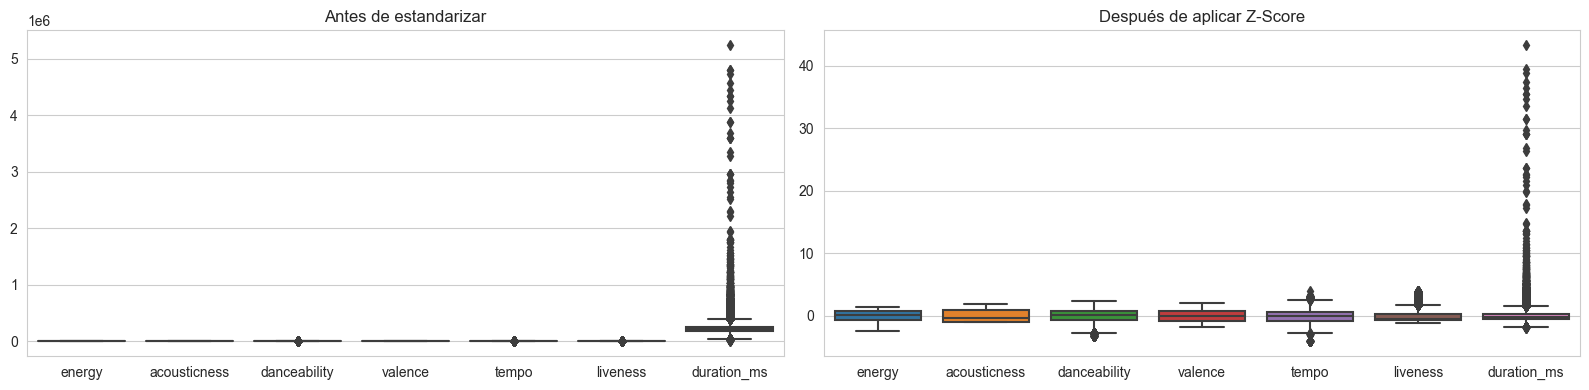

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Antes de escalar
sns.boxplot(data=df[vars_to_scale], ax=axs[0])
axs[0].set_title("Antes de estandarizar")

# Después de escalar
sns.boxplot(data=scaled_df[vars_to_scale], ax=axs[1])
axs[1].set_title("Después de aplicar Z-Score")

plt.tight_layout()
plt.show()

Aunque se haya estandarizado el conjunto de datos, la gran cantidad de *outliers* que presenta *duration_ms* afecta negativamente al proceso de estandarización. Este hecho es contraproducente para llevar a cabo las agrupaciones en la siguiente fase por lo que se decide prescindir de ella finalmente para el desarrollo del modelo.

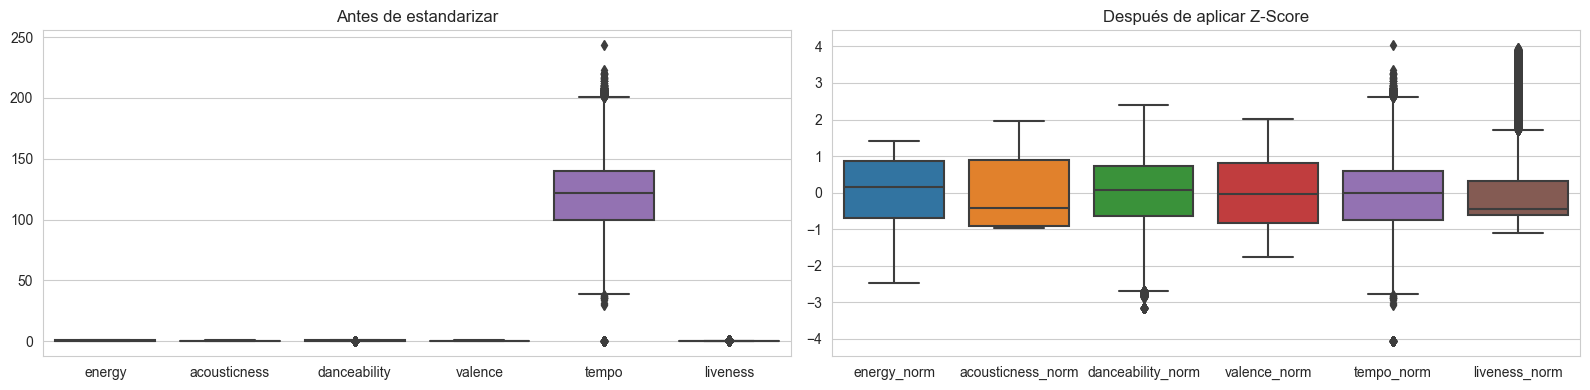

In [41]:


# Variables que no se estandarizarán
excluded_vars = ['mode', 'explicit', 'key', 'time_signature', 'duration_ms']

# Seleccionamos columnas numéricas continuas a estandarizar
vars_to_scale = [
    col for col in selected_df.select_dtypes(include='number').columns
    if col not in excluded_vars
]

# Instanciar el scaler
scaler = StandardScaler()

# Ajustar el scaler y obtener los valores estandarizados
scaled_values = scaler.fit_transform(selected_df[vars_to_scale])
scaled_columns = [f"{col}_norm" for col in vars_to_scale]

df_filtered[scaled_columns] = scaled_values

# Generar el gráfico comparativo
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.boxplot(data=selected_df[vars_to_scale], ax=axs[0])
axs[0].set_title("Antes de estandarizar")

sns.boxplot(data=df_filtered[scaled_columns], ax=axs[1])
axs[1].set_title("Después de aplicar Z-Score")

plt.tight_layout()
plt.show()

Al excluir *duration_ms* del proceso de estandarización, las distribuciones del resto de variables se equilibran correctamente y se centran alrededor de cero tras aplicar la transformación Z-Score. La decisión de no incluir *duration_ms* en este proceso se debe a la elevada dispersión y valores extremos que presenta lo que podrían distorsionar la estructura de los grupos en el proceso de *clustering*.

&nbsp;

**Nota: En este punto el conjunto de datos final estará formado por el conjunto de datos original que facilitará las tareas de interpretación en la fase de evaluación del modelo y, además, contará con el nuevo conjunto de datos normalizado que se utilizará para generar las agrupaciones.**



---

## 2.3. Construcción de nuevos datos

En esta etapa de preprocesamiento de datos se llevan a cabo tareas relacionadas con la derivación de nuevas variables o la categorización de variables ya existentes. Sin embargo, en este proyecto no se considera necesario generar nuevas variables, ya que el conjunto de datos original proporciona suficientes características musicales para cumplir con los objetivos del análisis. No obstante, gracias a la naturaleza iterativa de la metodología CRISP-DM, si durante el proceso de modelado se identificase la necesidad de crear alguna variable adicional, siempre será posible regresar a esta fase y realizar los ajustes correspondientes.  

&nbsp;

---

## 2.4. Integración de datos

En esta subetapa de la fase de preparación de datos, se realizan operaciones de integración de datos provenientes de distintas fuentes con el fin de obtener un conjunto unificado y completo si fuera necesario. Sin embargo, para este proyecto no se considera necesaria la integración de fuentes externas, ya que el conjunto de datos analizado proporciona toda la información requerida para el desarrollo del modelo. No obstante, si finalmente se dispone de tiempo, se realizará la integración de datos con el [Millenium Song Dataset](http://millionsongdataset.com/) tal y como se comentó en la propuesta del proyecto con la finalidad de demostrar el correcto funcionamiento del modelo no supervisado entrenado.
&nbsp;

---

## 2.5. Guardado del dataset preprocesado

Por último, se guardan los datos en un nuevo .csv que servirá de punto de partida para el desarrollo e integración de la fase de modelado.



In [42]:
df_filtered.to_csv('spotify_tracks_clean.csv', index=False)

Dado que el proceso de *clustering* se realizará en un nuevo notebook (02_clasificacion_evaluacion.ipynb) se decide guardar la instancia del *scaler* para asegurar que las transformaciones aplicadas a los datos sean idénticas a las realizadas durante la fase de preparación.

In [43]:
import joblib

joblib.dump(scaler, 'scaler_object.pkl')

['scaler_object.pkl']

&nbsp;

---

## 2.6. Resumen y conclusiones de la fase de preparación

En la fase de preparación de los datos se han realizado todas las tareas de preprocesado necesarias sobre el conjunto de datos **Spotify Tracks Dataset** para dar comienzo a la fase de modelado. Se ha visto que el número de datos duplicados al eliminar algunas variables ascendía considerablemente a un total ~30500 aproximadamente. Todos los **registros duplicados han sido eliminados para** evitar que puedan influir negativamente en la generación de grupos por parte de los algoritmos. Por otro lado, se ha descubierto que a la hora de estandarizar los datos mediante *z-score*, la variable *duration_ms* dominaba el conjunto al presentar multitud de *outliers*, lo que ha llevado a tomar la decisión de **no incluir esta variable en el conjunto de datos estandarizados para la generación de los clústeres**. 

Por último, cabe señalar que las tareas de construcción e integración de datos no se han considerado necesarias en esta fase, aunque se deja abierta la posibilidad de abordarlas en futuras iteraciones si el proceso de modelado lo requiere. La metodología CRISP-DM proporciona un marco de trabajo flexible e iterativo que permite regresar a etapas anteriores siempre que sea necesario. Así, si durante el modelado los resultados o las métricas de rendimiento no son satisfactorias, se podrá volver a las fases previas de preparación o comprensión de los datos para introducir los ajustes oportunos.